<a href="https://colab.research.google.com/github/subhashsomarouthu/Netflix-Movies-and-TV-Shows-Clustering/blob/main/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Netflix Movies and TV Shows Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/subhashsomarouthu/Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

In this project, you are required to do
Exploratory Data Analysis

Understanding what type content is available in different countries

Is Netflix has increasingly focusing on TV rather than movies in recent years.

Clustering similar content by matching text-based features

Business Objective:

The objective of this project is to gain insights and understanding from the Netflix dataset through Exploratory Data Analysis (EDA) and clustering. Additionally, the project aims to determine the type of content available in different countries, examine if Netflix has shifted its focus towards TV shows rather than movies in recent years, and cluster similar content based on text-based features.

The derived insights and findings will help Netflix and other stakeholders in the following ways:

1. Content Strategy: By understanding the type of content available in different countries, Netflix can tailor its content offerings and licensing strategies to cater to specific regional preferences. This can help optimize content acquisition and localization efforts.

2. Platform Focus: Analyzing whether Netflix has increasingly focused on TV shows rather than movies provides valuable insights into content trends and user preferences. This knowledge can guide decision-making regarding content production, licensing, and resource allocation for both TV shows and movies.

3. Personalized Recommendations: The clustering of similar content based on text-based features can improve the accuracy and relevance of Netflix's recommendation system. By providing users with recommendations based on content similarities, the platform can enhance user satisfaction and engagement, leading to increased customer retention and platform usage.

4. Market Insights: The integration of external datasets, such as IMDB ratings and rotten tomatoes, can provide additional insights into the quality and popularity of Netflix content. This information can assist in evaluating content performance, identifying potential content partnerships, and making informed decisions regarding content acquisition and production.

Overall, the project's objective is to leverage data analysis techniques to extract meaningful insights from the Netflix dataset, enabling data-driven decision-making for content strategy, platform focus, personalized recommendations, and market insights.



# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import matplotlib.cm as cm
import seaborn as sns
import math
import time
from wordcloud import WordCloud
import re
import string

from scipy.stats import norm
from scipy import stats
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_auc_score,precision_score,recall_score,f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
import scipy.cluster.hierarchy as sch
#importing kmeans
from sklearn.cluster import KMeans

#importing random forest and XgB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

#Non-negative matrix Factorization
from sklearn.decomposition import NMF


from sklearn.naive_bayes import MultinomialNB

#principal component analysis
from sklearn.decomposition import PCA


#silhouette score

from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import davies_bouldin_score


#importing stopwords
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
#for tokenization
from nltk.tokenize import word_tokenize
# for POS tagging(Part of speech in NLP sentiment analysis)
nltk.download('averaged_perceptron_tagger')

#import stemmer
from nltk.stem.snowball import SnowballStemmer

#import tfidf
from sklearn.feature_extraction.text import TfidfVectorizer

#LDA
!pip install pyLDAvis
import pyLDAvis
from sklearn.decomposition import LatentDirichletAllocation

#importing contraction
!pip install contractions
import contractions

from sklearn.cluster import AgglomerativeClustering
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification

from tabulate import tabulate
import itertools

#importing shap for model explainability
!pip install shap
import shap

import warnings
warnings.filterwarnings("ignore")
%matplotlib inline


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


  Using cached numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.5
    Uninstalling numpy-1.23.5:
      Successfully uninstalled numpy-1.23.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


  Using cached numpy-1.23.5-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.1 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pyldavis 3.4.1 requires numpy>=1.24.2, but you have numpy 1.23.5 which is incompatible.


Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


### Dataset Loading

In [3]:
# Load Dataset

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capstone_project/capstone_4_clustering/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')

### Dataset First View

In [5]:
# Dataset First Look
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [6]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,NaN,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [13]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [14]:
# Dataset Duplicate Value Count
len(df[df.duplicated()])

0

#### Missing Values/Null Values

In [15]:
# Missing Values/Null Values Count
df.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

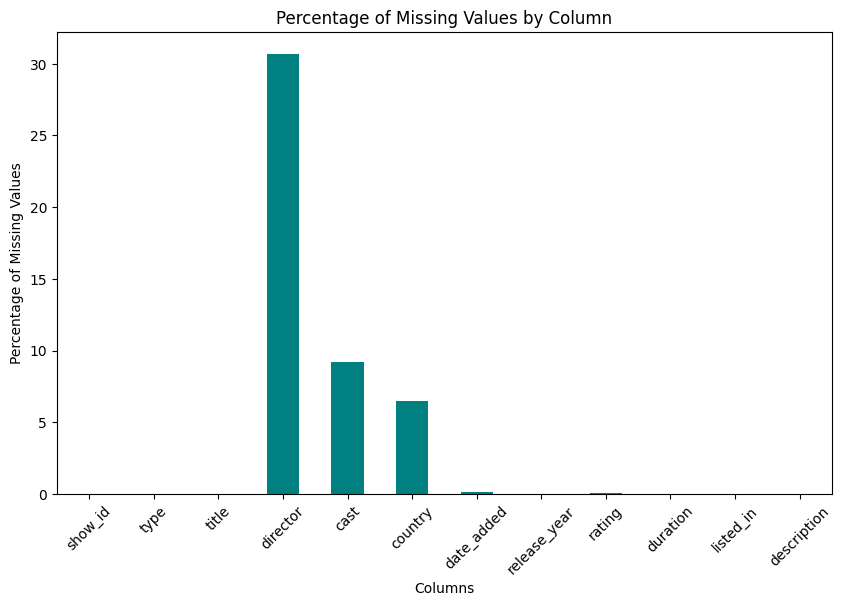

In [8]:
missing_percentage = df.isnull().sum() / len(df) * 100

# Create a bar plot to visualize the missing values
plt.figure(figsize=(10, 6))
missing_percentage.plot(kind='bar', color='teal')

plt.title('Percentage of Missing Values by Column')
plt.xlabel('Columns')
plt.ylabel('Percentage of Missing Values')
plt.xticks(rotation=45)
plt.show()

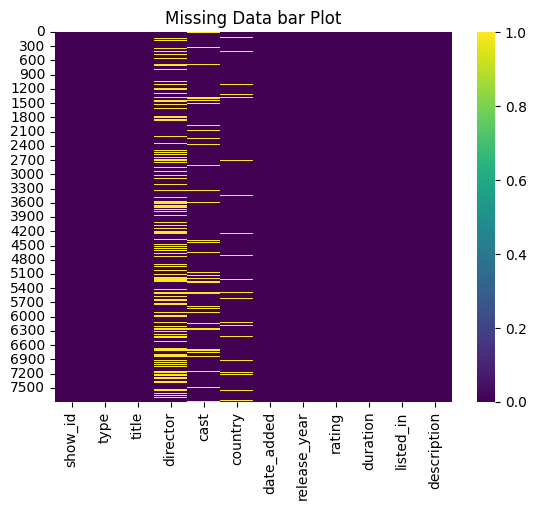

In [9]:
# Visualizing the missing values
import missingno as msno


sns.heatmap(df.isna(),cmap="viridis")

plt.title('Missing Data bar Plot')
plt.show()

### What did you know about your dataset?

The dataset contains information on Tv shows and movies available on netflix as of 2019. It consists of 7787 rows and 12 columns. I observed that there are no duplicate values,but there are misssing values/null values in the dataset.There are 3631 null values in the dataset, 2389 null values in director column, 718 null values in cast column ,507 null values in country column ,10 in date_added and 7 in rating. So we need to handle null values. Except release year all variables are objects(string), release year is of int data type.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe(include='all')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
count,7787,7787,7787,5398,7069,7280,7777,7787.000000,7780,7787,7787,7787
unique,7787,2,7787,4049,6831,681,1565,NaN,14,216,492,7769
top,s1,Movie,3%,"Raúl Campos, Jan Suter",David Attenborough,United States,"January 1, 2020",NaN,TV-MA,1 Season,Documentaries,Multiple women report their husbands as missin...
freq,1,5377,1,18,18,2555,118,NaN,2863,1608,334,3
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.932580,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.757395,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1925.000000,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013.000000,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2017.000000,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018.000000,NaN,NaN,NaN,NaN


In [12]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Variables Description

Show Id : Unique Id for every movie/ Tv show

Type    : Identifier(Movie/Tv show)

Title   : Title of the movie or Tv show

Director: Director name

Cast    : Actors involved

Country : country of production

Date added: date a movie/show was added on the netflix

release_year: actual release year of show/movie

rating   :Tv rating of the show

duration : total duration in minutes or number of seasons

listed_in : type of genre

description: summary of the show/movie



### Check Unique Values for each variable.

In [13]:
# Check Unique Values for each variable.

for i in df.columns.tolist():
  print('unique values in ',i, 'are', df[i].nunique())



unique values in  show_id are 7787
unique values in  type are 2
unique values in  title are 7787
unique values in  director are 4049
unique values in  cast are 6831
unique values in  country are 681
unique values in  date_added are 1565
unique values in  release_year are 73
unique values in  rating are 14
unique values in  duration are 216
unique values in  listed_in are 492
unique values in  description are 7769


In [14]:
df['type'].unique()

array(['TV Show', 'Movie'], dtype=object)

In [15]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

## 3. ***Data Wrangling***

### Data Wrangling Code

In [16]:
# Write your code to make your dataset analysis ready.

#lets copy our dataset

df_copy=df.copy()



In [17]:
#lets handle null values before EDA.




#Replacing missing values in 'director' column with value 'unknown'

df_copy['director'].fillna('unknown', inplace=True)


#Replacing missing values in 'cast' column with value 'unknown'
df_copy['cast'].fillna('unknown', inplace=True)


#Replacing missing values in 'country' column with mode
df_copy['country'].fillna('Unavailable', inplace=True)


#Replacing missing values in 'rating' column with value most frequent rating i.e. mode
df_copy['rating'] = df_copy['rating'].fillna(df_copy['rating'].mode()[0])

# Dropping the null values in 'date_added'
df_copy = df_copy[df_copy['date_added'].notna()]

In [18]:
df_copy['type'] = pd.Categorical(df_copy['type'])

In [19]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df_copy['censor'] = df_copy['rating'].replace(ratings)


In [20]:
df_copy['censor'] = pd.Categorical(df_copy['censor'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [21]:
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults


In [22]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7777 non-null   object  
 1   type          7777 non-null   category
 2   title         7777 non-null   object  
 3   director      7777 non-null   object  
 4   cast          7777 non-null   object  
 5   country       7777 non-null   object  
 6   date_added    7777 non-null   object  
 7   release_year  7777 non-null   int64   
 8   rating        7777 non-null   object  
 9   duration      7777 non-null   object  
 10  listed_in     7777 non-null   object  
 11  description   7777 non-null   object  
 12  censor        7777 non-null   category
dtypes: category(2), int64(1), object(10)
memory usage: 744.6+ KB


### What all manipulations have you done and insights you found?

I have copied my dataset into df_copy and handled null values on this dataset.

I have kept unknown for missing values in Director and cast columns. Country unavailable for country column, mode for rating column and dropped the null values in date_added column.

Lets do data visualization on df_copy dataset.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Certainly! Here are 13 meaningful charts for your EDA, along with a question for each chart and the corresponding answers through visualization. I will also provide insights from each chart, assess whether the gained insights can create a positive business impact, and identify any potential insights that may lead to negative growth:

Chart 1: Bar Plot - Content Type Distribution
Question: What is the distribution of content types (TV shows vs. movies) in the dataset?
Insights: The chart reveals the proportion of TV shows and movies in the dataset.
Business Impact: Understanding the content type distribution can help Netflix determine the balance between TV shows and movies in their content acquisition strategy. Positive business impact can be achieved by optimizing the mix of content types based on user preferences.

Chart 2: Bar Plot - Top 10 Countries with Most Content
Question: Which countries have the most content available on Netflix?
Insights: The chart showcases the countries with the highest number of TV shows and movies in the dataset.
Business Impact: This insight can aid in content licensing decisions, content localization efforts, and targeting specific markets with higher content availability. It can contribute positively to business growth.

Chart 3: Bar Plot - Rating Distribution
Question: What is the distribution of content ratings in the dataset?
Insights: The chart displays the distribution of content ratings assigned to the TV shows and movies.
Business Impact: Understanding the rating distribution helps Netflix ensure appropriate content categorization and helps users make informed viewing choices. It can positively impact user satisfaction and engagement.

Chart 4: Bar Plot - Content Duration Distribution
Question: What is the distribution of content durations (in minutes or seasons) in the dataset?
Insights: The chart showcases the distribution of content durations, whether in terms of movie lengths or TV show seasons.
Business Impact: Analyzing content duration helps Netflix understand user preferences for shorter or longer content, informing decisions on content production, acquisition, and recommendation algorithms for personalized viewing experiences.

Chart 5: Bar Plot - Top Genres
Question: What are the top genres/categories of content available on Netflix?
Insights: The chart highlights the most prevalent genres or categories in the dataset.
Business Impact: Identifying popular genres can guide content acquisition strategies, content creation, and recommendations. It can positively influence user engagement and satisfaction.

Chart 6: Line Plot - Content Release Trend over Time
Question: How has the number of TV shows and movies released on Netflix changed over the years?
Insights: The line plot illustrates the trend of content releases (TV shows and movies) on Netflix over time.
Business Impact: Monitoring release trends can help Netflix identify shifts in content production strategies, gauge market demand, and optimize content acquisition efforts to provide fresh and up-to-date content to users.

Chart 7: Bar Plot - Content Release by Year
Question: How many TV shows and movies were released each year?
Insights: The chart presents the count of TV shows and movies released in different years.
Business Impact: Analyzing the release count by year allows Netflix to understand content growth patterns, identify successful years, and allocate resources effectively for content acquisition and production.

Chart 8: Bar Plot - Top Directors with Most Content
Question: Who are the top directors with the most content on Netflix?
Insights: The chart showcases the directors with the highest number of TV shows and movies in the dataset.
Business Impact: Identifying top directors can help Netflix build relationships, collaborate on future projects, and leverage the popularity of their content to drive user engagement and platform growth.

Chart 9: Bar Plot - Top Cast Members
Question: Who are the top cast members with the most appearances in Netflix content?
Insights: The chart reveals the cast members who appear most frequently in TV shows and movies.
Business Impact: Identifying popular cast members can help Netflix target promotions, enhance content recommendations, and leverage their popularity to attract and retain users.

Chart 10: Bar Plot - Content Addition by Month and Year
Question: How does the addition of TV shows and movies vary by month and year?
Insights: The chart presents the count of TV shows and movies added to Netflix each month and year.
Business Impact: Understanding the patterns of content addition over time can assist in resource planning, content marketing strategies, and ensuring a steady flow of new content to attract and retain users.

Chart 11: Bar Plot - Top Content by IMDb Ratings
Question: Which TV shows and movies have the highest IMDb ratings?
Insights: The chart showcases the TV shows and movies with the highest IMDb ratings.
Business Impact: Promoting highly-rated content can attract users, improve user satisfaction, and positively impact viewer engagement. It can also guide content acquisition decisions based on quality and user preferences.

Chart 12: Pie Chart - Content Type Distribution by Country
Question: How does the distribution of TV shows and movies vary across different countries?
Insights: The pie chart illustrates the proportion of TV shows and movies in each country.
Business Impact: Analyzing the content type distribution by country helps Netflix understand regional content preferences, target specific markets with relevant content, and tailor content acquisition strategies accordingly.

Chart 13: Word Cloud - Popular Keywords in Descriptions
Question: What are the most common keywords or themes in the descriptions of TV shows and movies?
Insights: The word cloud visualizes the frequently occurring keywords or themes in the descriptions.
Business Impact: Identifying popular keywords or themes can assist in content tagging, recommendation algorithms, and understanding user interests. It can positively impact content discovery and user engagement.

By conducting these analyses and visualizations, you can gain valuable insights into the Netflix dataset. Assessing the business impact of these insights is crucial:

- Most insights are likely to create a positive business impact. They can inform content acquisition strategies, content creation decisions, targeted marketing campaigns, personalized recommendations, and overall user satisfaction.



<Axes: xlabel='type', ylabel='count'>

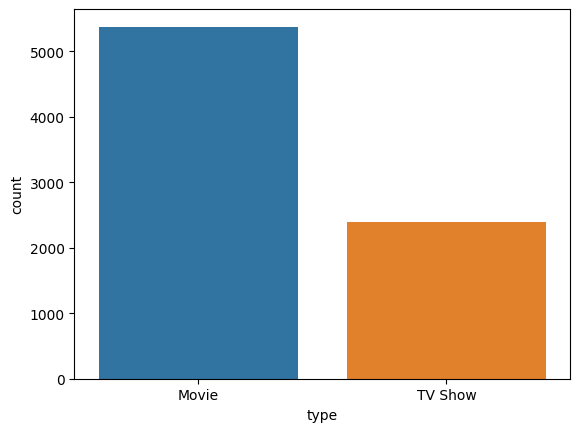

In [23]:
# Chart - 1 visualization code
#countplot to visualize the number of movies and tv_shows in type column
sns.countplot(x = 'type', data = df_copy)




##### 1. Why did you pick the specific chart?

countplot gives the count of each type in a feature. Here we have Movies and Tv shows

##### 2. What is/are the insight(s) found from the chart?

It is evident that movies are more on netflix than Tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

 Netflix can assess the popularity and demand for each type of content. This knowledge can inform content acquisition decisions, production strategies, and recommendations, leading to a better understanding of user preferences and potentially improving user engagement.

#### Chart - 2

#ratings

In [24]:
# Chart - 2 visualization code
#storing tv shows and movies separately

tv_shows=df_copy[df_copy['type']=='TV Show']
movies=df_copy[df_copy['type']=='Movie']



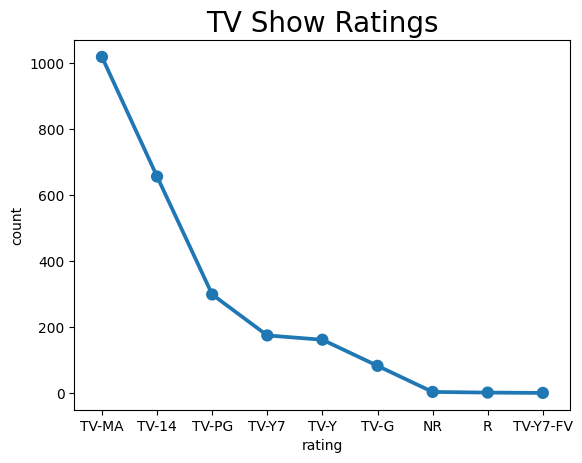

In [25]:
tv_ratings = tv_shows.groupby(['rating'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
fig_dims = (1610)

sns.pointplot(x='rating',y='count',data=tv_ratings)
plt.title('TV Show Ratings',size='20')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a point plot (specifically, sns.pointplot()) to visualize the ratings distribution of TV shows. A point plot is suitable for showcasing categorical data (ratings) and their corresponding counts.

##### 2. What is/are the insight(s) found from the chart?

 It displays the count of TV shows in each rating category, indicating the popularity of different ratings. Here, TV_MA rating is given to most of the Tvshows which is nothing but Adult tv shows

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can inform content acquisition decisions, content creation strategies, and personalized recommendations based on user preferences. If more people are watching Adult tvshows, netflix can focus on producing more content on that.

#### Chart - 3

<Axes: title={'center': 'movie ratings'}, xlabel='rating', ylabel='count'>

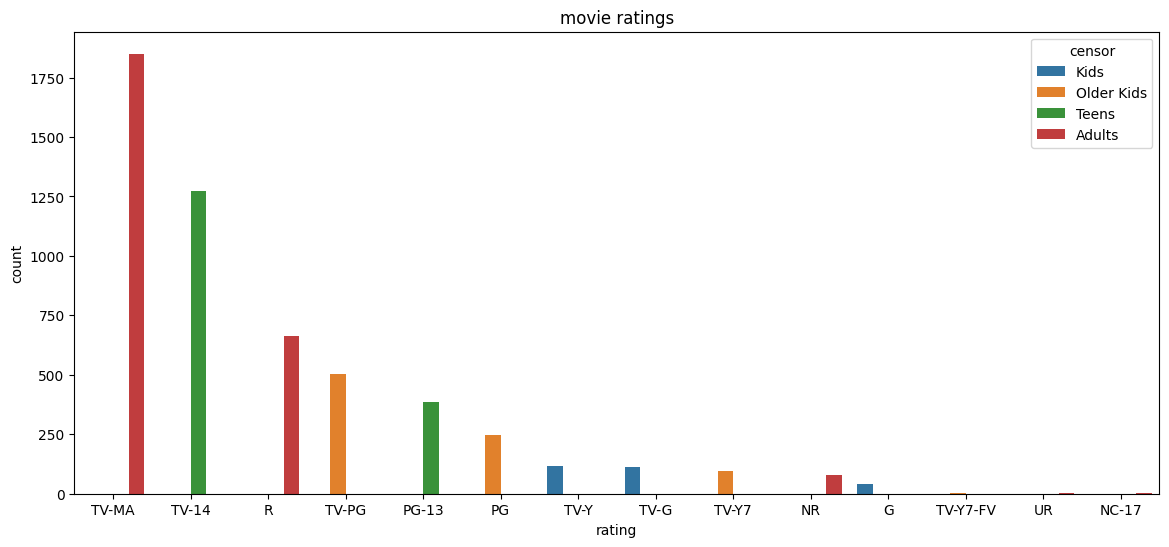

In [26]:
# Chart - 3 visualization code
#Movie Ratings based on censor categories

plt.figure(figsize=(14,6))
plt.title('movie ratings')
sns.countplot(x=movies['rating'],hue=movies['censor'],data=movies,order=movies['rating'].value_counts().index)

##### 1. Why did you pick the specific chart?

 countplot allows for easy comparison of the count of movie ratings, while the hue parameter adds an additional categorical variable (censor categories) to provide further insights.

##### 2. What is/are the insight(s) found from the chart?

Here also same TV-MA rating is high for movies, which means more adult movies are on netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing movie ratings based on censor categories, Netflix can gain an understanding of the distribution of ratings for different censor categories.This information can inform content acquisition decisions, content filtering options, and recommendations.

#### Chart - 4

release_year

In [27]:
# Chart - 4 visualization code
no_movies_year =movies['release_year'].value_counts().sort_index(ascending=False)
no_tvshows_year =tv_shows['release_year'].value_counts().sort_index(ascending=False)

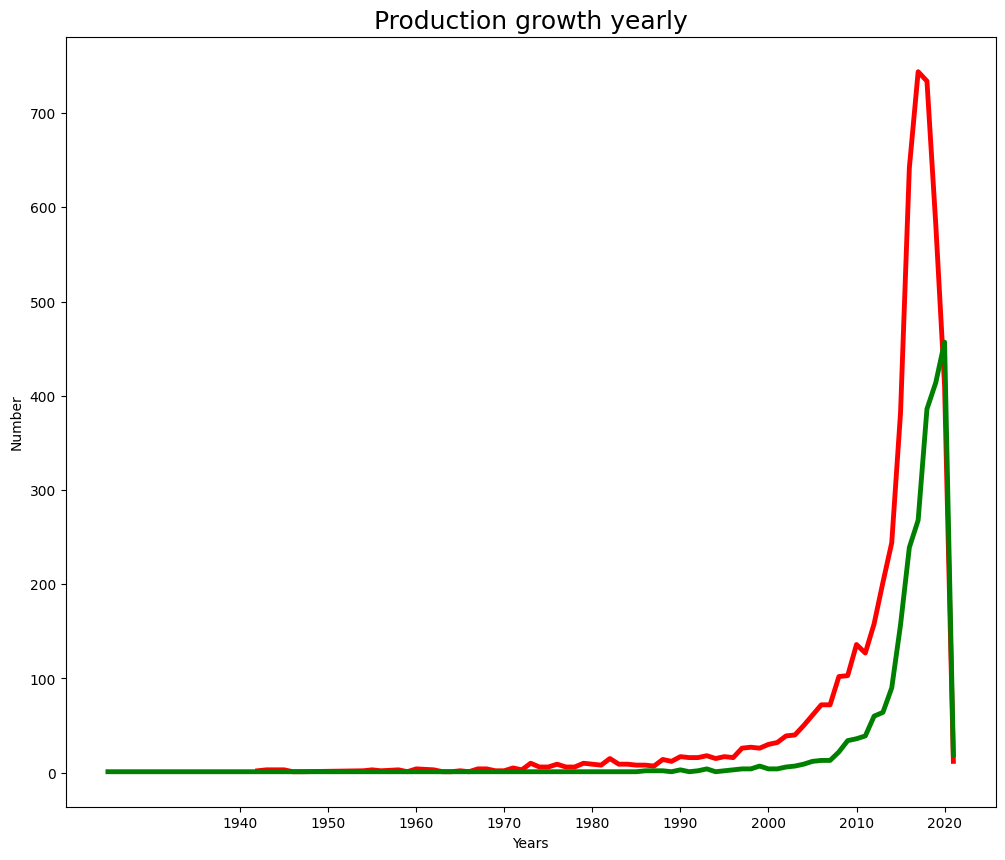

In [28]:
#comparing release of movies and tv_shows yearly

no_movies_year.plot(figsize=(12, 10), linewidth=3.5, color='red',label="Movies / year")
no_tvshows_year.plot(figsize=(12, 10), linewidth=3.5, color='green',label="TV Shows / year")
plt.xlabel("Years")
plt.ylabel("Number")
plt.title("Production growth yearly", fontsize=18);
years = [1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]  # Add the specific years you want to display
plt.xticks(years);

##### 1. Why did you pick the specific chart?

I chose a line plot to visualize the yearly production growth of movies and TV shows. A line plot is suitable for showcasing trends and changes over time.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that after 2000, production of movies and tv_shows has increases rapidly. After 2017 or 2018 production seem to dropped significantly.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the yearly production growth of movies and TV shows, Netflix can identify patterns and trends in content creation.

#### Chart - 5

<Axes: xlabel='count', ylabel='release_year'>

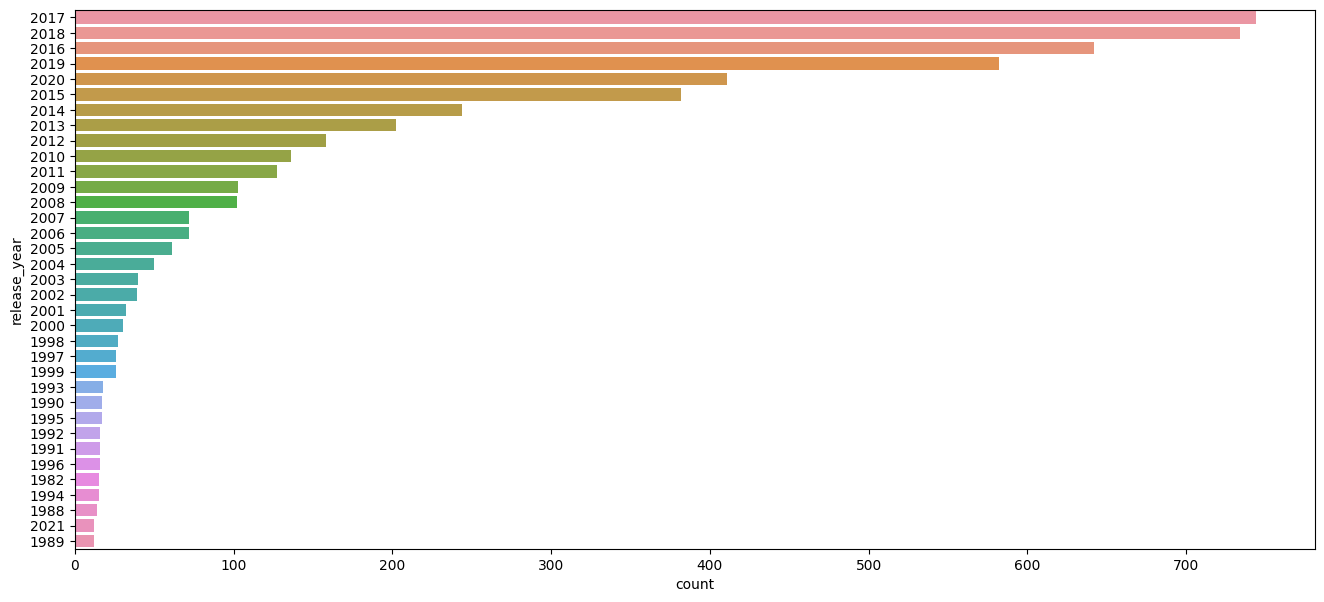

In [29]:
# Chart - 5 visualization code
#Movies released per year in the last two decades.

plt.figure(figsize=(16,7))
sns.countplot(y=movies['release_year'],data=df_copy,order=movies['release_year'].value_counts().index[0:35])

<Axes: xlabel='count', ylabel='release_year'>

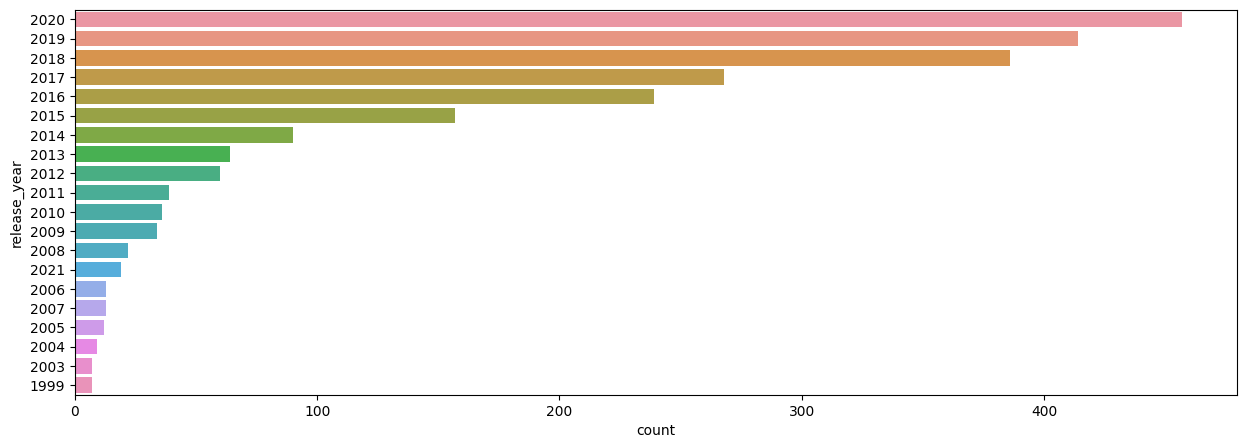

In [30]:
#Analysing how many movies released per year in last 15 years
plt.figure(figsize=(15,5))
sns.countplot(y=tv_shows['release_year'],data=df_copy,order=tv_shows['release_year'].value_counts().index[0:20])

##### 1. Why did you pick the specific chart?

I chose a horizontal bar plot (countplot) to visualize the count of Movies and TV shows released each year. A horizontal bar plot is suitable for displaying the distribution of a categorical variable (release year) and allows for easy comparison.

##### 2. What is/are the insight(s) found from the chart?

In Movies, most of the movies produced in 2017 and 2018.
In Tv_shows, most of the shows produced in 2020 and 2019.

An observation here is, number of movies from 2017 being produced are low. The production rate of movies has been decreasing from 2017. while production rate of Tv_shows has been increasing from 2016. Even though number of movies are high, the production rate is decreasing in turn by 2021, tv shows(19) are more produced than movies(12).

This tells us that, from 2016, netflix has been focusing more on Tv_shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight can help create a positive business impact. By analyzing the count of TV show releases each year, Netflix can identify trends, patterns, and popular years for TV show production. This is the reason we are seeing netflix has been focusing on increasing tv_shows from 2016.

#### Chart - 6

#countries

In [31]:
# Chart - 6 visualization code
# Top 10 countries
#Creating a new feature 'main_Country'
top10_country= df_copy['country'].apply(lambda x: x.split(",")[0])






Text(0.5, 1.0, 'Top 10 Countries with Most Content')

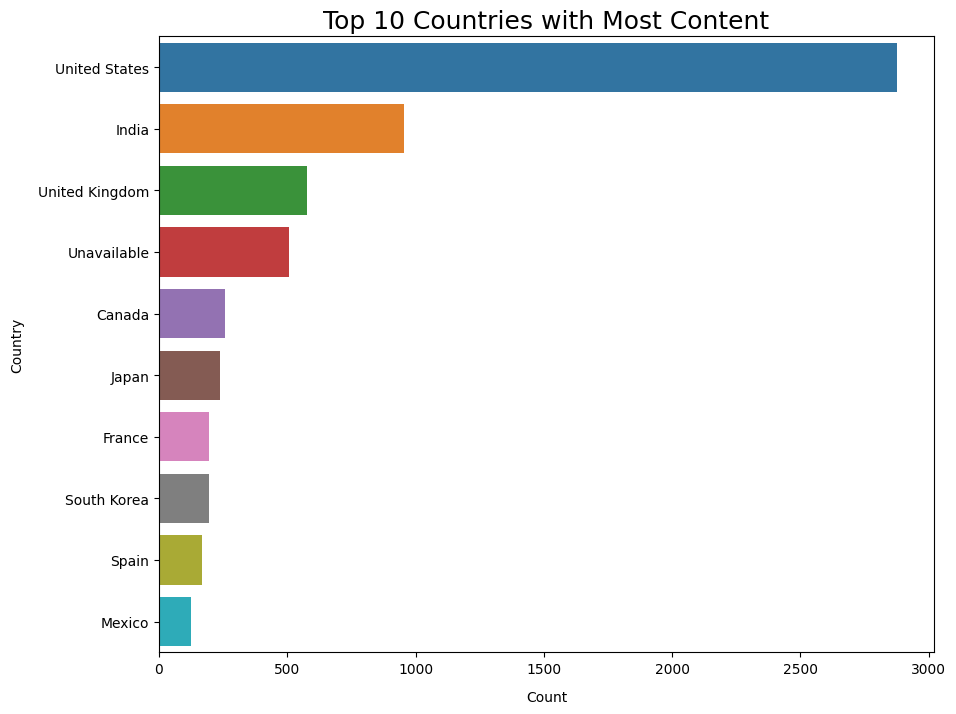

In [32]:
#top_10 content producing countries on Netflix
plt.figure(figsize=(10,8))

sns.countplot(y=top10_country, data=df_copy, order=top10_country.value_counts().index[:10])

plt.xlabel("Count", labelpad=10)
plt.ylabel("Country", labelpad=10)
plt.title("Top 10 Countries with Most Content", fontsize=18)


##### 1. Why did you pick the specific chart?

I chose a countplot with the country variable on the y-axis because it allows for a clear visualization of the count of content from different countries.  

##### 2. What is/are the insight(s) found from the chart?

It is evident that USA is the largest producer of content on netflix followed by India and UK.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insight can help create a positive business impact. By analyzing the count of content from different countries, Netflix can identify the countries with the highest production and popularity of content. This information can guide content acquisition decisions, content localization strategies, and regional targeting.

#### Chart - 7

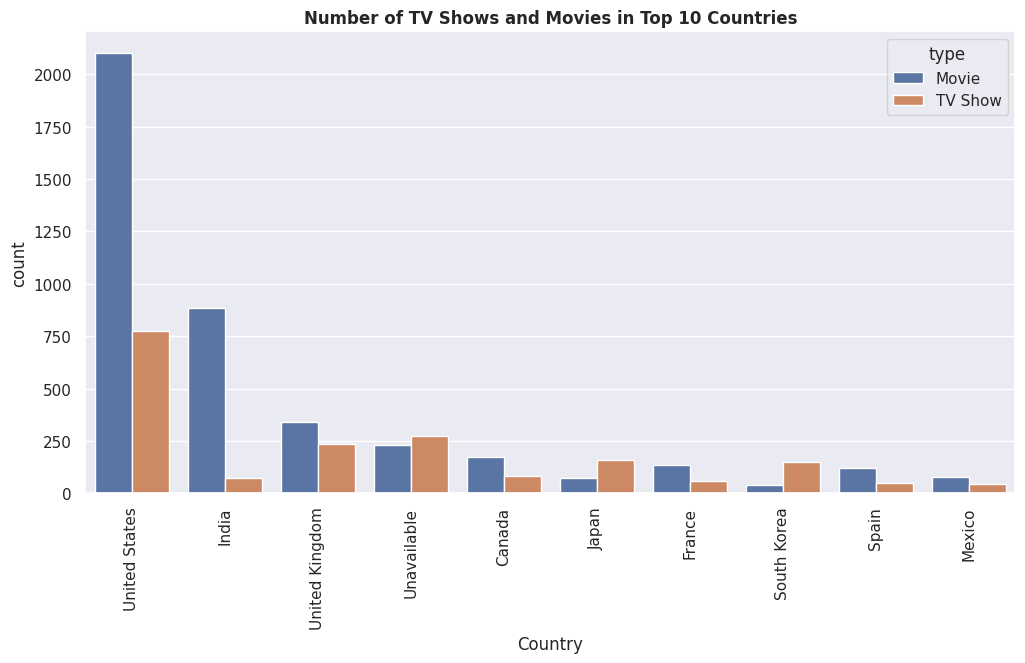

In [33]:
# Chart - 7 visualization code
#Number of TV Shows and Movies in top 10 countries
sns.set()
plt.figure(figsize=(12, 6))
ax = sns.countplot(x=top10_country, data=df_copy, hue="type", order=top10_country.value_counts().index[:10])

plt.xticks(rotation=90)
plt.xlabel('Country')
plt.title("Number of TV Shows and Movies in Top 10 Countries", fontweight="bold")
plt.show()

##### 1. Why did you pick the specific chart?

I chose a countplot with the top 10 countries on the x-axis because it allows for a clear visualization of the count of TV shows and movies in each country. By using the hue parameter to differentiate between TV shows and movies, it provides a comprehensive view of the type of content in each country.

##### 2. What is/are the insight(s) found from the chart?

In most of the countries, Movies are being produced more on netflix than Tv_shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the count of TV shows and movies in the top 10 countries, Netflix can understand the content preferences and popularity of different types of content in specific regions. It can help Netflix tailor its content offerings to specific markets.

#### Chart - 8

Directors

In [34]:
# Chart - 8 visualization code
#top 10 directors
top10_directors=df_copy[df_copy['director']!='unknown']


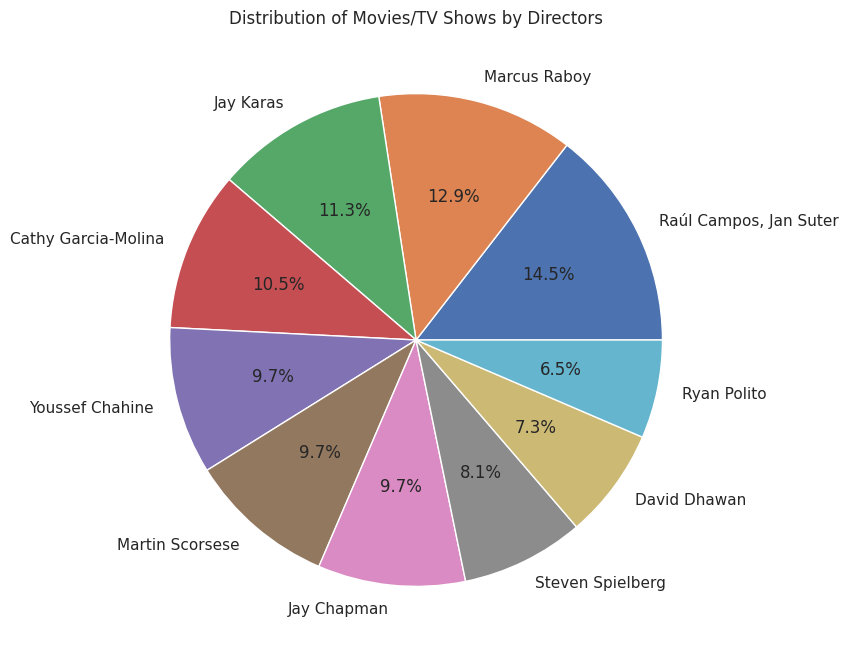

In [35]:
#plotting top10 directors producing all types of content on netflix

director_counts = top10_directors['director'].value_counts().head(10)

plt.figure(figsize=(8, 8))
plt.pie(director_counts.values, labels=director_counts.index, autopct='%1.1f%%')
plt.title('Distribution of Movies/TV Shows by Directors')
plt.show()

##### 1. Why did you pick the specific chart?

I chose a pie chart to visualize the distribution of movies/TV shows among the top 10 directors. A pie chart allows for a clear representation of the proportions of each director's contribution to the total count of movies/TV shows.

##### 2. What is/are the insight(s) found from the chart?

Raul Campos and Jan Suter are the top directors who produced content on Netflix.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By this,Netflix can identify the most influential directors in terms of content production. It can also contribute to enhancing the content library, attracting talented directors, and potentially creating high-quality and popular content that resonates with viewers.

#### Chart - 9

#Top_10 Actors

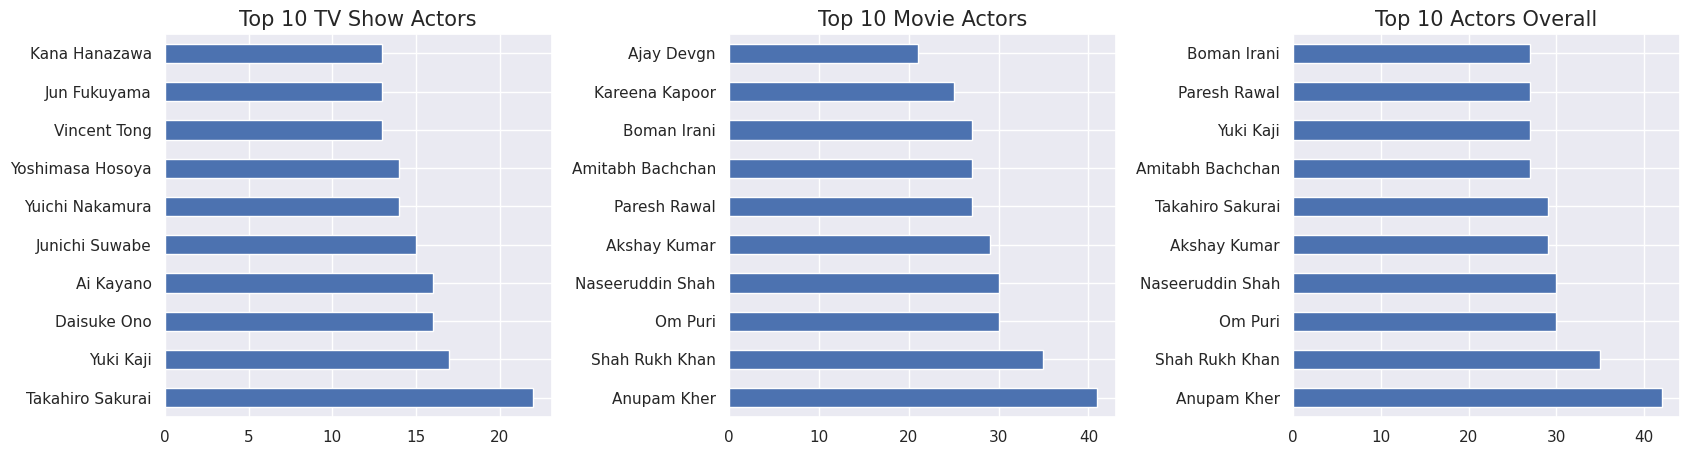

In [36]:
fig, ax = plt.subplots(1, 3, figsize=(18, 5))

# Separating TV show actors from the cast column and excluding "unknown" values
top_TVshows_actor = df_copy[df_copy['type'] == 'TV Show']['cast'].str.split(', ', expand=True).stack()
top_TVshows_actor = top_TVshows_actor[top_TVshows_actor != 'unknown']

# Plotting actors who appeared in the highest number of TV shows
top10_TVshows_actor_plot = top_TVshows_actor.value_counts().head(10).plot(kind='barh', ax=ax[0])
top10_TVshows_actor_plot.set_title('Top 10 TV Show Actors', size=15)

# Separating movie actors from the cast column and excluding "unknown" values
top_movie_actor = df_copy[df_copy['type'] == 'Movie']['cast'].str.split(', ', expand=True).stack()
top_movie_actor = top_movie_actor[top_movie_actor != 'unknown']

# Plotting actors who appeared in the highest number of movies
top10_movie_actor_plot = top_movie_actor.value_counts().head(10).plot(kind='barh', ax=ax[1])
top10_movie_actor_plot.set_title('Top 10 Movie Actors', size=15)

# Combining TV show and movie actors and plotting overall top 10 actors
top_actors = pd.concat([top_TVshows_actor, top_movie_actor])
top10_actors_plot = top_actors.value_counts().head(10).plot(kind='barh', ax=ax[2])
top10_actors_plot.set_title('Top 10 Actors Overall', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


##### 1. Why did you pick the specific chart?

I chose a bar plot to visualize the top 10 actors in TV shows, movies, and overall because it provides a clear representation of the count of appearances by each actor

##### 2. What is/are the insight(s) found from the chart?

In Tv shows, Takahiro Sakurai is the top actor acted in more shows, in movies Anulam Kher is the top actor and overall Anupam Kher is the top actor acted in more movies and Tvshows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

By analyzing the top actors in TV shows, movies, and overall, Netflix can gain insights into the actors who have a strong presence and following among viewers.It can help Netflix tailor its offerings to feature popular actors and attract a wider audience by delivering content that aligns with viewers' preferences.

#### Chart - 10

#Genre

In [37]:
!pip install squarify

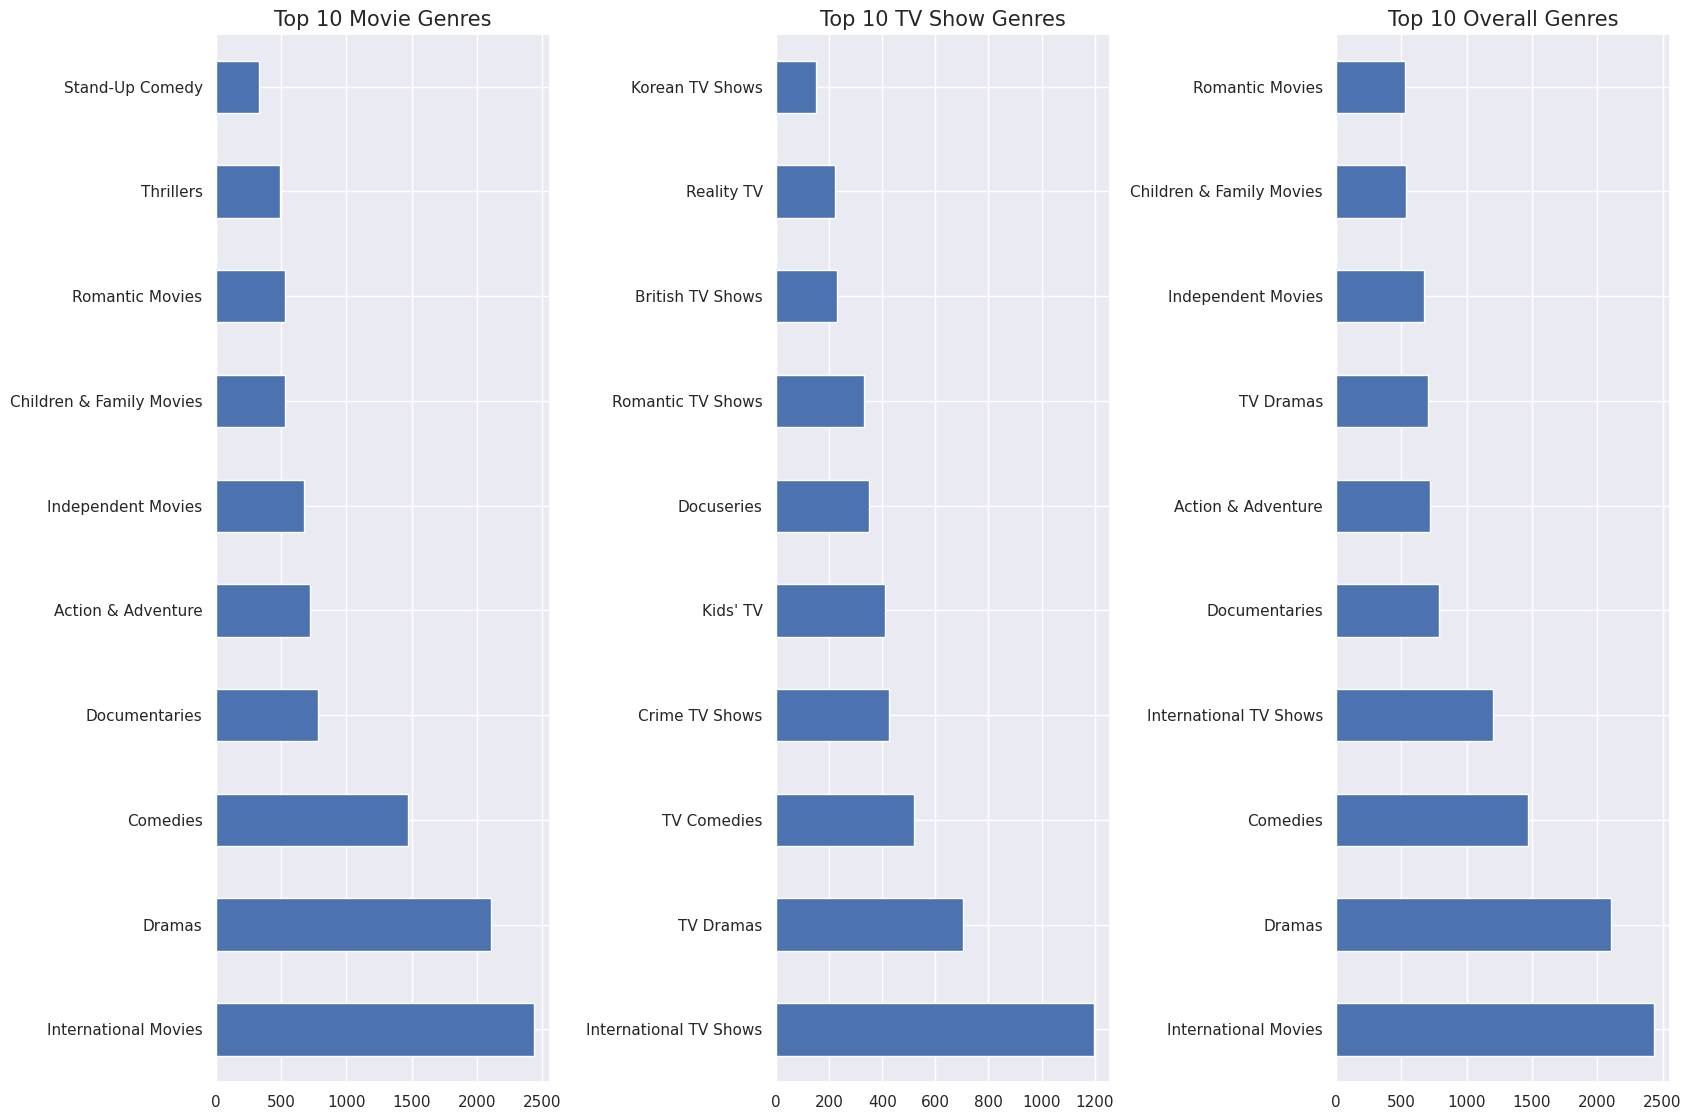

In [38]:
# Chart - 10 visualization code

fig, ax = plt.subplots(1, 3, figsize=(18, 12))

# Top 10 Genres for Movies
top_movie_genres = df_copy[df_copy['type'] == 'Movie']['listed_in'].str.split(', ', expand=True).stack()
top10_movie_genres = top_movie_genres.value_counts().head(10)
top10_movie_genres_plot = top10_movie_genres.plot(kind='barh', ax=ax[0])
top10_movie_genres_plot.set_title('Top 10 Movie Genres', size=15)

# Top 10 Genres for TV Shows
top_tv_genres = df_copy[df_copy['type'] == 'TV Show']['listed_in'].str.split(', ', expand=True).stack()
top10_tv_genres = top_tv_genres.value_counts().head(10)
top10_tv_genres_plot = top10_tv_genres.plot(kind='barh', ax=ax[1])
top10_tv_genres_plot.set_title('Top 10 TV Show Genres', size=15)

# Top 10 Overall Genres
top_genres = df_copy['listed_in'].str.split(', ', expand=True).stack()
top10_genres = top_genres.value_counts().head(10)
top10_genres_plot = top10_genres.plot(kind='barh', ax=ax[2])
top10_genres_plot.set_title('Top 10 Overall Genres', size=15)

plt.tight_layout(pad=1.2, rect=[0, 0, 0.95, 0.95])
plt.show()


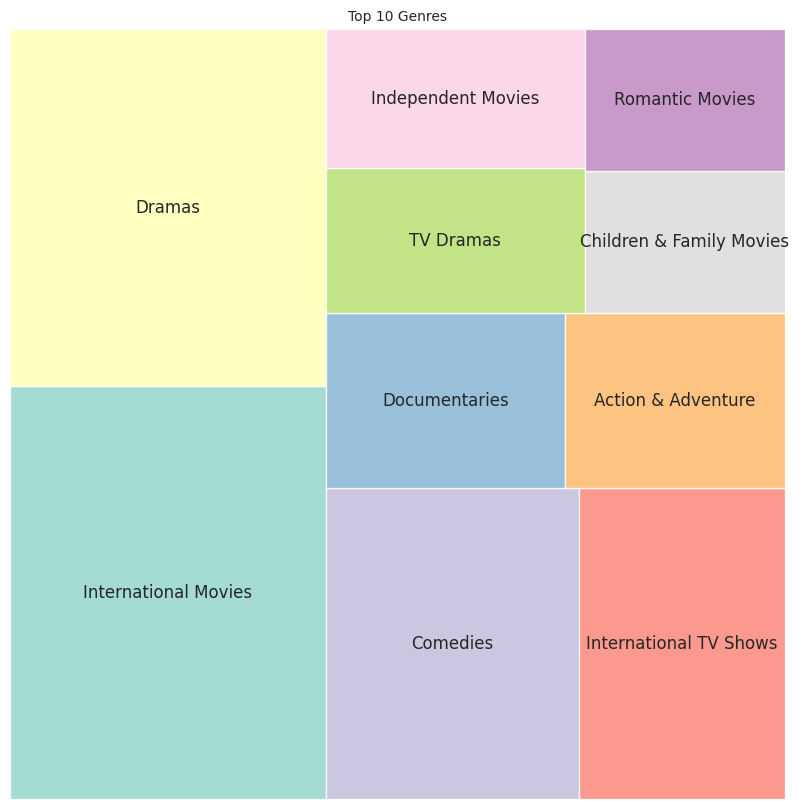

In [39]:
import squarify

# Top 10 Genres
top_genres = df_copy['listed_in'].str.split(', ', expand=True).stack()
top10_genres = top_genres.value_counts().head(10)

# Calculate the relative sizes for the treemap
sizes = top10_genres.values
labels = top10_genres.index
color = plt.cm.Set3(range(len(labels)))

# Create the treemap
plt.figure(figsize=(10, 10))
squarify.plot(sizes=sizes, label=labels, color=color, alpha=0.8)

# Add labels and title
plt.title('Top 10 Genres', size=10)
plt.axis('off')

plt.show()


##### 1. Why did you pick the specific chart?

I chose barplot to visualize the top 10 genres movie wise, Tv_shows and overall.
I also used treemap chart to visualize the top 10 genres because it effectively displays the relative proportions of different categories. The size of each rectangle in the treemap represents the frequency or count of each genre.

##### 2. What is/are the insight(s) found from the chart?

In both movies, Tv_shows and overall, International movies, tv_shows are the top genres followed by Drama and Comedy.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It gives positive impact by understanding the most popular genres among the movies and TV shows on Netflix, businesses can make informed decisions regarding content acquisition, production, and marketing. It can help streaming platforms like Netflix in curating their content library, targeting specific audience preferences, and attracting more viewers.

#### Chart - 11

Release- Month wise

In [40]:
# Chart - 11 visualization code

df_copy['month'] = pd.DatetimeIndex(df_copy['date_added']).month
df_copy.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Adults,8
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Adults,12
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Adults,12
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",Teens,11
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,Teens,1


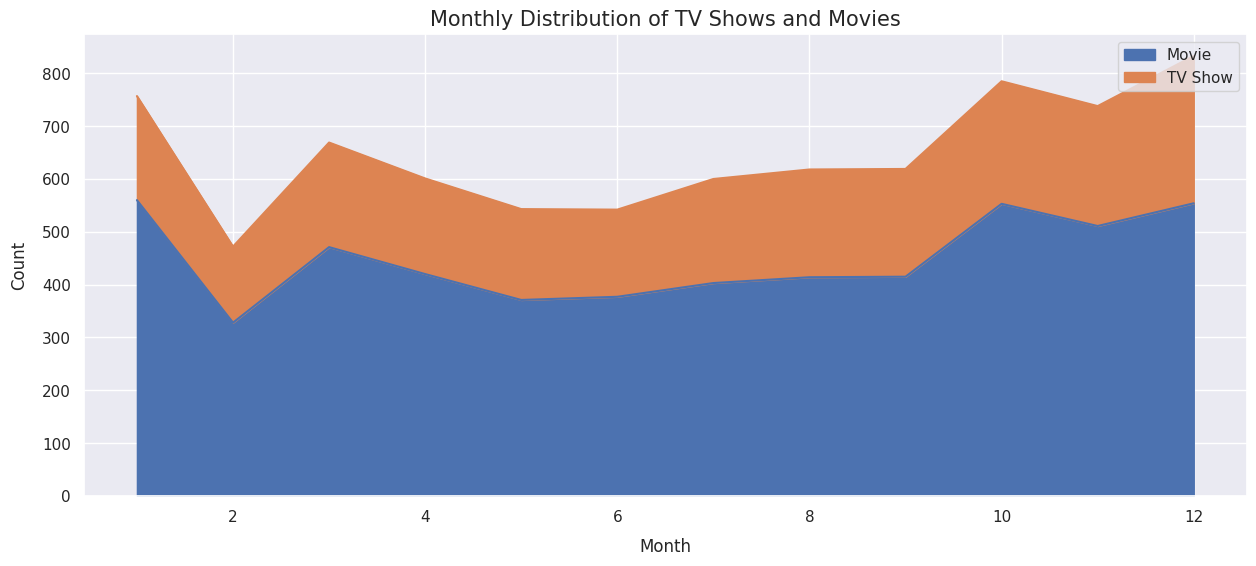

In [41]:
fig, ax = plt.subplots(figsize=(15, 6))

# Group the data by month and count the number of TV shows and movies
monthly_counts = df_copy.groupby(['month', 'type']).size().unstack()

# Plot a stacked area chart
monthly_counts.plot(kind='area', stacked=True, ax=ax)

# Customize the plot
ax.set_xlabel('Month', labelpad=10)
ax.set_ylabel('Count', labelpad=10)
ax.set_title('Monthly Distribution of TV Shows and Movies', fontsize=15)
ax.legend(loc='upper right')

plt.show()



##### 1. Why did you pick the specific chart?

I chose a stacked area chart to visualize the monthly distribution of TV shows and movies because it effectively shows the overall trend and the contribution of each type (TV shows and movies) over time.

##### 2. What is/are the insight(s) found from the chart?

It can be seen that, more movies and tv_shows were released in the months of January, October, November and December which is a holiday season and makes sense that more people would engage netflix.


##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

It provides valuable information on the popularity and demand for TV shows and movies over time. If subcriber information present in the dataset, then with above graph netflix can decide when to release content and when not.

#### Chart - 12

#Duration

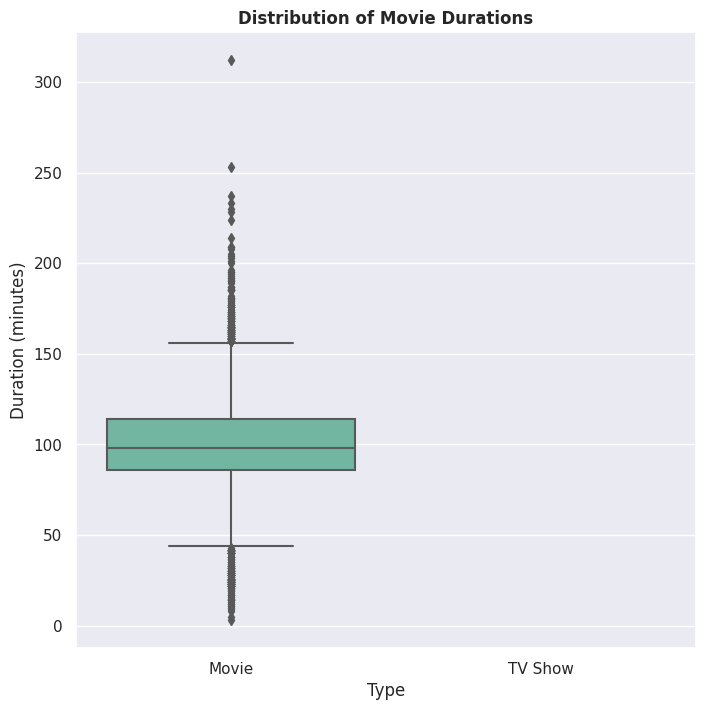

In [42]:
# Chart - 12 visualization code
#Checking the distribution of Movie Duration
plt.figure(figsize=(8, 8))

# Extract the numeric values from the 'duration' column for movies
movies['duration_numeric'] = movies['duration'].str.extract('(\d+)', expand=False).astype(float)

# Plot a box plot of movie durations
sns.boxplot(x='type', y='duration_numeric', data=movies, palette='Set2')

# Customize the plot
plt.title('Distribution of Movie Durations', fontweight='bold')
plt.xlabel('Type')
plt.ylabel('Duration (minutes)')
plt.show()


<Axes: title={'center': 'Distribution of TV Shows duration'}, xlabel='duration', ylabel='count'>

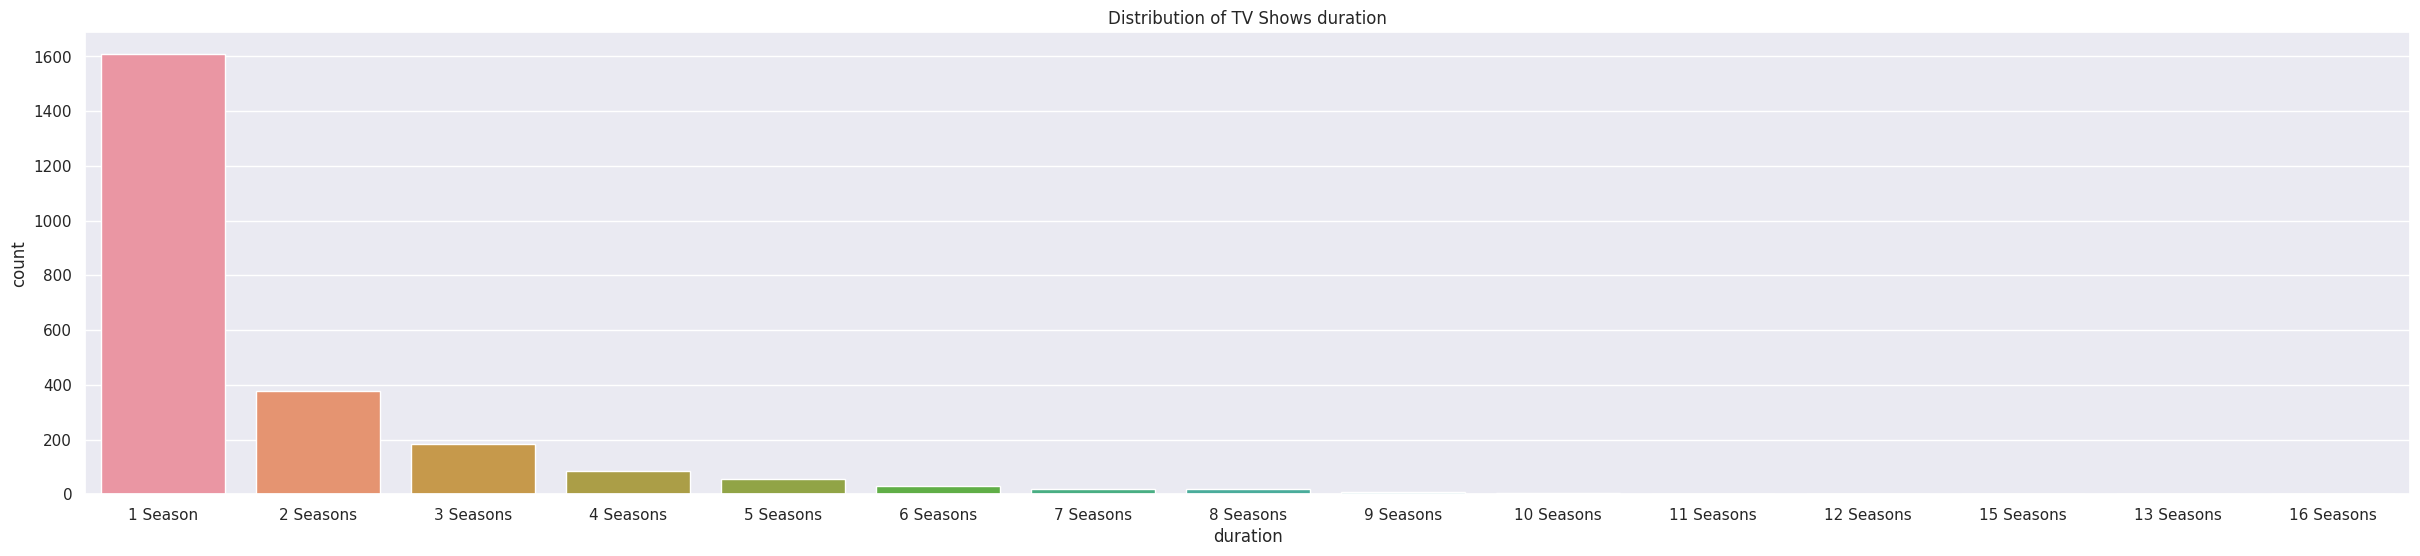

In [43]:
plt.figure(figsize=(30,6))
plt.title("Distribution of TV Shows duration")
sns.countplot(x=tv_shows['duration'],data=tv_shows,order = tv_shows['duration'].value_counts().index)



##### 1. Why did you pick the specific chart?

I chose a box plot to visualize the distribution of movie durations because it gives us the range of movies lying in the inter quartile range.

I also used count plot to visualize tv_shows duration.

##### 2. What is/are the insight(s) found from the chart?

Most duration for many movies is 50 to 150 minutes and for tv_shows, many are single seasoned shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This cannot directely give positive business context but if given subscriber watching time or reviews, then we can plot a graph to see whether duration is playing any role in subscribers list and reviews. By using that, Netflix can produce movies or tv shows with audience desired duration.

#### Chart - 13

#description

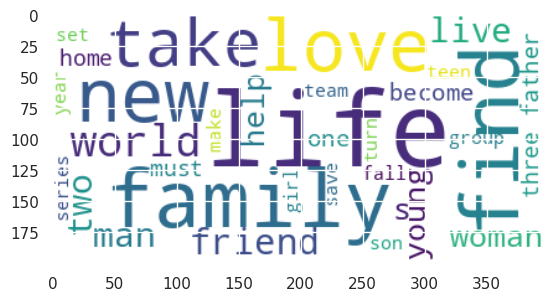

In [44]:
# Chart - 13 visualization code

from wordcloud import WordCloud, STOPWORDS
text = " ".join(word for word in df_copy['description'])

# create the word cloud using WordCloud library
wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', min_font_size=15).generate(text)

# plot the word cloud
plt.imshow(wordcloud,  interpolation='bilinear')
plt.show()

##### 1. Why did you pick the specific chart?

The word cloud chart was chosen to visually represent the most frequent words in the 'description' column.

##### 2. What is/are the insight(s) found from the chart?

The most frequent words are Love, life,family,find,two,man

#### Chart - 14 - Correlation Heatmap

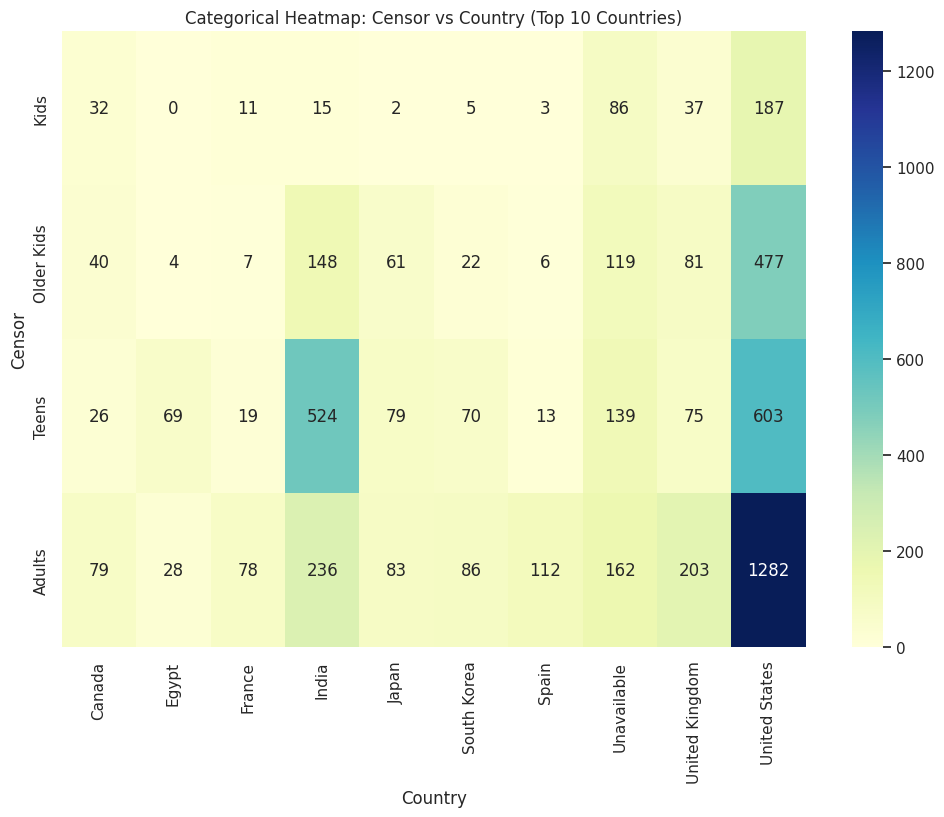

In [45]:
# Correlation Heatmap visualization code

# Create a subset of the dataframe with the relevant columns
subset_df = df_copy[['censor', 'country']]

# Drop rows with missing values
subset_df.dropna(inplace=True)

# Get the top 10 countries by count
top_10_countries = subset_df['country'].value_counts().head(10).index

# Filter the data for the top 10 countries
subset_df = subset_df[subset_df['country'].isin(top_10_countries)]

# Pivot the data to get the frequency counts for each combination of variables
heatmap_data = subset_df.groupby(['censor', 'country']).size().unstack()

# Plot the frequency heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='g')
plt.title('Categorical Heatmap: Censor vs Country (Top 10 Countries)')
plt.xlabel('Country')
plt.ylabel('Censor')
plt.show()


##### 1. Why did you pick the specific chart?

The frequency heatmap was chosen as it is suitable for visualizing the distribution and relationships between categorical variables, specifically the 'censor' and 'country' variables. It allows us to observe the frequency counts for each combination of these variables visually.

##### 2. What is/are the insight(s) found from the chart?

Adult content is more produced in US followed by UK. Whereas in India Teen content is produced more than Adult.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1.Hypothetical Statement:Netflix has been focusing on tv shows rather than movis in recent years from 2017 to 2021.

2.Hypothetical Statement: There is a significant difference in the distribution of release years between TV shows and movies.

3.Hypothetical Statement: The distribution of censor ratings is significantly different between movies and TV shows.


### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): The average release year of TV shows and movies in recent years (2017-2021) is the same. There is no significant difference in the release year between TV shows and movies.

H1 (Alternative Hypothesis): The average release year of TV shows and movies in recent years (2017-2021) is different. There is a significant difference in the release year between TV shows and movies, indicating a focus on either TV shows or movies during this period.

#### 2. Perform an appropriate statistical test.

In [46]:
from statsmodels.stats.weightstats import ztest

# Filter the data for TV shows and movies in the recent years (2017-2021)
tv_shows_recent = df_copy[(df_copy['type'] == 'TV Show') & (df_copy['release_year'].between(2017, 2021))]
movies_recent = df_copy[(df_copy['type'] == 'Movie') & (df_copy['release_year'].between(2017, 2021))]

# Perform the z-test
z_statistic, p_value = ztest(tv_shows_recent['release_year'], movies_recent['release_year'])

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We Reject the Null Hypothesis(H0).There is a significant difference in the average release year between TV shows and movies in recent years.")
    print("Netflix is focusing more on either Tv shows or Movies")
else:
    print("We accept the Null Hypothesis(H0).There is no significant difference in the average release year between TV shows and movies in recent years.")
    print("Netflix is not focusing on either Tv shows or Movies, it is same.")

# Print the z-statistic and p-value
print("Z-statistic: ", z_statistic)
print("P-value: ", p_value)


We Reject the Null Hypothesis(H0).There is a significant difference in the average release year between TV shows and movies in recent years.
Netflix is focusing more on either Tv shows or Movies
Z-statistic:  12.578590794397122
P-value:  2.7692573833225633e-36


##### Which statistical test have you done to obtain P-Value?

The statistical test used in the provided code is the z-test.

##### Why did you choose the specific statistical test?

 It is used when the sample size is large (typically greater than 30) and the population standard deviation is known.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H0): The distribution of release years is the same for TV shows and movies.

Alternative Hypothesis (H1): There is a significant difference in the distribution of release years between TV shows and movies.

#### 2. Perform an appropriate statistical test.

In [47]:
# Perform Statistical Test to obtain P-Value

from scipy.stats import chi2_contingency

# Create a contingency table of release years and content type
contingency_table = pd.crosstab(df_copy['release_year'], df_copy['type'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of release years between TV shows and movies.")
else:
    print("We accept the Null Hypothesis(H0).There is no significant difference in the distribution of release years between TV shows and movies.")

# Print the chi-square statistic and p-value
print("Chi-square statistic: ", chi2)
print("P-value: ", p_value)



We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of release years between TV shows and movies.
Chi-square statistic:  479.2803966813769
P-value:  1.837172819494578e-61


##### Which statistical test have you done to obtain P-Value?

I used chi-square test of independence to examine the association between the release year category and the type (TV show or movie).

##### Why did you choose the specific statistical test?

The chi-square test of independence was chosen because it is appropriate for analyzing the association between two categorical variables, in this case, the release year (categorized into different years) and the content type (TV shows or movies). Since the release year is a discrete variable, the chi-square test is suitable for comparing the distribution of release years between TV shows and movies and determining if there is a significant difference.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

H0 (Null Hypothesis): The distribution of censor ratings is not significantly different between movies and TV shows.

H1 (Alternative Hypothesis): The distribution of censor ratings is significantly different between movies and TV shows

#### 2. Perform an appropriate statistical test.

In [48]:
# Perform Statistical Test to obtain P-Value
from scipy.stats import chi2_contingency

# Create a contingency table of censor ratings and content type
contingency_table = pd.crosstab(df_copy['censor'], df_copy['type'])

# Perform the chi-square test of independence
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

# Set the significance level
alpha = 0.05

# Check if the p-value is less than the significance level
if p_value < alpha:
    print("We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of censor ratings between movies and TV shows.")
else:
    print("We accpet the Null Hypothesis(H0).There is no significant difference in the distribution of censor ratings between movies and TV shows.")

# Print the chi-square statistic and p-value
print("Chi-square statistic: ", chi2)
print("P-value: ", p_value)


We Reject the Null Hypothesis(H0).There is a significant difference in the distribution of censor ratings between movies and TV shows.
Chi-square statistic:  102.78063579034351
P-value:  3.922199415408211e-22


##### Which statistical test have you done to obtain P-Value?

The statistical test used to obtain the p-value is the chi-square test of independence.

##### Why did you choose the specific statistical test?

The chi-square test of independence is suitable for analyzing the relationship between two categorical variables. In this case, we are examining the relationship between censor ratings (categorical variable) and content type (movies or TV shows, another categorical variable). The chi-square test helps determine if there is a significant association between these variables, indicating whether the distribution of censor ratings differs significantly between movies and TV shows. We have also seen that in visualization that more adult content is present on netflix.


## ***6. Feature Engineering & Data Pre-processing***

In [49]:
#making  a copy of my dataset for feature engineering and data pre-processing.
df_fe=df_copy.copy()

In [50]:
df_fe[['censor', 'type']] = df_fe[['censor', 'type']].astype('category')


In [51]:
non_text_df = df_fe[['type', 'duration','release_year','censor']]

In [52]:
non_text_df = pd.get_dummies(non_text_df, columns=['type', 'censor'])


In [53]:
non_text_df['type_Movie'] = non_text_df['type_Movie'].astype(int)
non_text_df['type_TV Show'] = non_text_df['type_TV Show'].astype(int)
non_text_df['censor_Kids'] = non_text_df['censor_Kids'].astype(int)
non_text_df['censor_Older Kids'] = non_text_df['censor_Older Kids'].astype(int)
non_text_df['censor_Teens'] = non_text_df['censor_Teens'].astype(int)
non_text_df['censor_Adults'] = non_text_df['censor_Adults'].astype(int)


In [54]:
non_text_df

,duration,release_year,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults
0,4 Seasons,2020,0,1,0,0,0,1
1,93 min,2016,1,0,0,0,0,1
2,78 min,2011,1,0,0,0,0,1
3,80 min,2009,1,0,0,0,1,0
4,123 min,2008,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
7782,99 min,2005,1,0,0,0,0,1
7783,111 min,2015,1,0,0,0,1,0
7784,44 min,2019,1,0,0,0,0,1
7785,1 Season,2019,0,1,0,1,0,0


In [356]:
non_text_df = pd.concat([non_text_df.drop(['type','rating'],axis =1),pd.get_dummies(ratings), pd.get_dummies(non_text_df['type'])], axis =1)

In [358]:
non_text_df[['Adult', 'Kids', 'Older Kids', 'Teens', 'Movie', 'TV Show']] = non_text_df[['Adult', 'Kids', 'Older Kids', 'Teens', 'Movie', 'TV Show']].astype(int)

In [56]:
non_text_df

,duration,release_year,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults
0,4 Seasons,2020,0,1,0,0,0,1
1,93 min,2016,1,0,0,0,0,1
2,78 min,2011,1,0,0,0,0,1
3,80 min,2009,1,0,0,0,1,0
4,123 min,2008,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...
7782,99 min,2005,1,0,0,0,0,1
7783,111 min,2015,1,0,0,0,1,0
7784,44 min,2019,1,0,0,0,0,1
7785,1 Season,2019,0,1,0,1,0,0


### 1. Handling Missing Values

In [57]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7777 non-null   object  
 1   type          7777 non-null   category
 2   title         7777 non-null   object  
 3   director      7777 non-null   object  
 4   cast          7777 non-null   object  
 5   country       7777 non-null   object  
 6   date_added    7777 non-null   object  
 7   release_year  7777 non-null   int64   
 8   rating        7777 non-null   object  
 9   duration      7777 non-null   object  
 10  listed_in     7777 non-null   object  
 11  description   7777 non-null   object  
 12  censor        7777 non-null   category
 13  month         7777 non-null   int32   
dtypes: category(2), int32(1), int64(1), object(10)
memory usage: 1.0+ MB


In [288]:
# Handling Missing Values & Missing Value Imputation
#there are no missing values
df_fe.isnull().sum()


show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
censor          0
month           0
dtype: int64

### 2. Handling Outliers

<Axes: ylabel='month'>

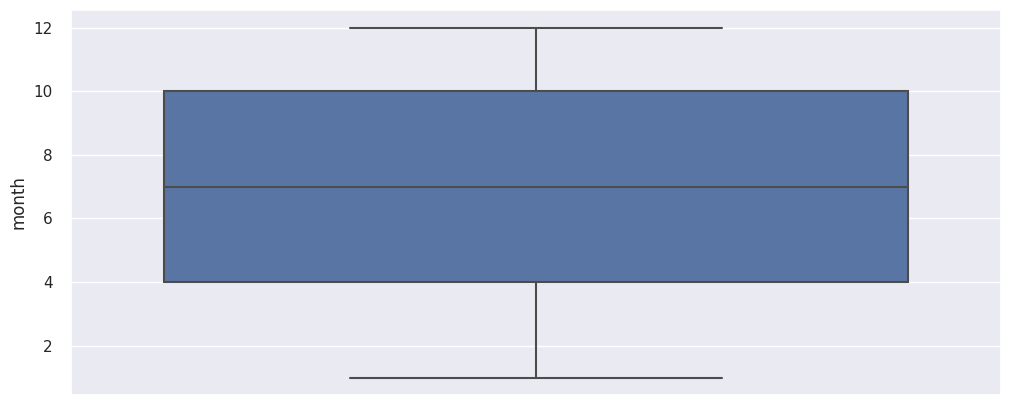

In [289]:
# Handling Outliers & Outlier treatments
# Display boxplot

# plotting graph
fig= plt.subplots( figsize=(12,5))

sns.boxplot(y='month',data=df_fe)


##### What all outlier treatment techniques have you used and why did you use those techniques?

Except month and release year all variables have texts.

### 3. Categorical Encoding

In [ ]:
# Encoding type and rating
non_text_df = pd.concat([non_text_df.drop(['type','rating'],axis =1),pd.get_dummies(ratings), pd.get_dummies(non_text_df['type'])], axis =1)

In [ ]:
non_text_df[['Adult', 'Kids', 'Older Kids', 'Teens', 'Movie', 'TV Show']] = non_text_df[['Adult', 'Kids', 'Older Kids', 'Teens', 'Movie', 'TV Show']].astype(int)

In [69]:
non_text_df

,duration,release_year,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults,show_duration,movie_duration
0,4 Seasons,2020,0,1,0,0,0,1,4,0
1,93 min,2016,1,0,0,0,0,1,0,93
2,78 min,2011,1,0,0,0,0,1,0,78
3,80 min,2009,1,0,0,0,1,0,0,80
4,123 min,2008,1,0,0,0,1,0,0,123
...,...,...,...,...,...,...,...,...,...,...
7782,99 min,2005,1,0,0,0,0,1,0,99
7783,111 min,2015,1,0,0,0,1,0,0,111
7784,44 min,2019,1,0,0,0,0,1,0,44
7785,1 Season,2019,0,1,0,1,0,0,1,0


In [65]:
import re

def extract_show_duration(x):
    match = re.search(r'(\d+) Season', x)
    if match:
        return int(match.group(1))
    return 0

def extract_movie_duration(x):
    match = re.search(r'(\d+) min', x)
    if match:
        return int(match.group(1))
    return 0

non_text_df['show_duration'] = non_text_df['duration'].apply(extract_show_duration)
non_text_df['movie_duration'] = non_text_df['duration'].apply(extract_movie_duration)



handling duration variable.

In [70]:
# binning of years
def bin_release_year(row):
  r_year = row['release_year']
  for yr in np.arange(2030,1910,-10):
    if r_year >= yr:
      return (yr)

non_text_df['release_year_bins'] =(non_text_df.apply(lambda x: bin_release_year(x), axis=1))

In [71]:
#dropping release_year column
non_text_df.drop('release_year', axis = 1, inplace=True)

In [72]:
non_text_df.drop('duration', axis = 1, inplace=True)

In [73]:
non_text_df

,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults,show_duration,movie_duration,release_year_bins
0,0,1,0,0,0,1,4,0,2020
1,1,0,0,0,0,1,0,93,2010
2,1,0,0,0,0,1,0,78,2010
3,1,0,0,0,1,0,0,80,2000
4,1,0,0,0,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...
7782,1,0,0,0,0,1,0,99,2000
7783,1,0,0,0,1,0,0,111,2010
7784,1,0,0,0,0,1,0,44,2010
7785,0,1,0,1,0,0,1,0,2010


In [74]:
non_text_df.isnull().values.any()

False

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

In [290]:
df_fe.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   show_id       7777 non-null   object  
 1   type          7777 non-null   category
 2   title         7777 non-null   object  
 3   director      7777 non-null   object  
 4   cast          7777 non-null   object  
 5   country       7777 non-null   object  
 6   date_added    7777 non-null   object  
 7   release_year  7777 non-null   int64   
 8   rating        7777 non-null   object  
 9   duration      7777 non-null   object  
 10  listed_in     7777 non-null   object  
 11  description   7777 non-null   object  
 12  censor        7777 non-null   category
 13  month         7777 non-null   int32   
dtypes: category(2), int32(1), int64(1), object(10)
memory usage: 1.0+ MB


In [75]:
df_fe['listed_in'] = df_fe.listed_in.apply(lambda row: row.split(', '))
df_fe.explode('listed_in')['listed_in'].unique()

array(['International TV Shows', 'TV Dramas', 'TV Sci-Fi & Fantasy',
       'Dramas', 'International Movies', 'Horror Movies',
       'Action & Adventure', 'Independent Movies', 'Sci-Fi & Fantasy',
       'TV Mysteries', 'Thrillers', 'Crime TV Shows', 'Docuseries',
       'Documentaries', 'Sports Movies', 'Comedies', 'Anime Series',
       'Reality TV', 'TV Comedies', 'Romantic Movies',
       'Romantic TV Shows', 'Science & Nature TV', 'Movies',
       'British TV Shows', 'Korean TV Shows', 'Music & Musicals',
       'LGBTQ Movies', 'Faith & Spirituality', "Kids' TV",
       'TV Action & Adventure', 'Spanish-Language TV Shows',
       'Children & Family Movies', 'TV Shows', 'Classic Movies',
       'Cult Movies', 'TV Horror', 'Stand-Up Comedy & Talk Shows',
       'Teen TV Shows', 'Stand-Up Comedy', 'Anime Features',
       'TV Thrillers', 'Classic & Cult TV'], dtype=object)

In [76]:
replacing_genre = {'International TV Shows': '-',
                   'TV Dramas': 'Drama',
                   'TV Sci-Fi & Fantasy': 'SciFiFantasy',
                   'Dramas': 'Drama' ,
                   'International Movies': '-',
                   'Horror Movies': 'Horror',
                   'Action & Adventure': 'ActionAdventure',
                   'Independent Movies': '-',
                   'Sci-Fi & Fantasy': 'SciFiFantasy',
                  'TV Mysteries': 'Mystery'       ,
                  'Thrillers': 'Thriller',
                   'Crime TV Shows': 'Crime',
                   'Docuseries': 'Documentary',
                  'Documentaries': 'Documentary', 'Sports Movies': 'Sports',
                   'Comedies':'Comedy',
                   'Anime Series': 'Anime',
                  'Reality TV': 'Reality',
                   'TV Comedies': 'Comedy',
                   'Romantic Movies': 'Romance',
                  'Romantic TV Shows': 'Romance',
                   'Science & Nature TV': 'Science',
                   'Movies': '-',
                  'British TV Shows': '-',
                   'Korean TV Shows': '-',
                   'Music & Musicals': 'Music',
                  'LGBTQ Movies': 'LGBTQ',
                   'Faith & Spirituality': 'Spirituality',
                   "Kids' TV": 'Kids',
                  'TV Action & Adventure': 'ActionAdventure',
                   'Spanish-Language TV Shows': '-',
                  'Children & Family Movies': 'Family',
                   'TV Shows': '-',
                   'Classic Movies': 'Classic',
                  'Cult Movies': 'Cult',
                   'TV Horror': 'Horror',
                   'Stand-Up Comedy & Talk Shows':'Comedy, TalkShow',
                  'Teen TV Shows': 'Teen', 'Stand-Up Comedy':'Comedy',
                   'Anime Features':'Anime',
                  'TV Thrillers': 'Thriller',
                   'Classic & Cult TV':'Classic, Cult'}

In [77]:
def genre_replace(row, replacing_genre = replacing_genre):
  new_text = []

  for word in (row['listed_in']):
    if word in replacing_genre:
      if '-' not in replacing_genre[word]:
       new_text.append(replacing_genre[word])
    else:
      print(word, 'not present in dictionary')

  return(', '.join(new_text))


df_fe['Genres'] = df_fe.apply(lambda row: genre_replace(row),axis=1)
df_fe['Genres'] = df_fe['Genres'].apply(lambda row: row.split(', '))

In [78]:
df_fe.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]"
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama]
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"[Horror Movies, International Movies]","When an army recruit is found dead, his fellow...",Adults,12,[Horror]
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"[Action & Adventure, Independent Movies, Sci-F...","In a postapocalyptic world, rag-doll robots hi...",Teens,11,"[ActionAdventure, SciFiFantasy]"
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,[Dramas],A brilliant group of students become card-coun...,Teens,1,[Drama]


In [79]:
#combining listed_in, directors and cast into single text

def combine(row):
  text = ' '.join(row['Genres']).lower()
  if row['cast'] != 'unknown':
    cast_list = [actor.replace(' ', '') for actor in row['cast'].split(', ')]
    if len(cast_list) < 5:
      text = text + ' ' + ' '.join(cast_list[:]).lower()
    else :
      text = text + ' ' + ' '.join(cast_list[:5]).lower()
  if row['director'] !='unknown':
    director_list = ' '.join([director.replace(' ', '') for director in row['director'].split(', ')])
    text = text + ' ' + director_list.lower()

  return text
df_fe['all_cast'] = df_fe.apply(lambda row: combine(row), axis = 1)


In [80]:
df_fe.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...


In [254]:
#df_fe.country = df_copy.country.str.split(',').tolist()

In [87]:
df_fe['all_features']=df_fe['all_cast']+ " " + df_fe['description']

In [88]:
df_fe.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast,proc_all_cast,proc_description,all_features
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...,drama scififantasy jo omiguel biancacomparato ...,in a future where the elite inhabit an island ...,drama scififantasy joãomiguel biancacomparato ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...,drama demi nbichir h ctorbonilla oscarserrano ...,after a devastating earthquake hits mexico cit...,drama demiánbichir héctorbonilla oscarserrano ...


In [89]:
df_fe['all_features'][0]

'drama scififantasy joãomiguel biancacomparato michelgomes rodolfovalente vanezaoliveira In a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor.'

In [57]:
df_copy.cast = df_copy.cast.str.split(',').tolist()
df_copy.country = df_copy.country.str.split(',').tolist()
df_copy.listed_in = df_copy.listed_in.str.split(',').tolist()

In director column more than 30% are null values, so i am not including it.

In [58]:
#here are my variables
df_copy['features'] = df_copy['listed_in'].astype(str) + " " + df_copy['description'].astype(str) + " " + df_copy['type'].astype(str) + " "  + df_copy['rating'].astype(str) + " "  + df_copy['country'].astype(str)+" " +df_copy['cast'].astype(str)

In [59]:
df_copy.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,features
0,s1,TV Show,3%,unknown,"[João Miguel, Bianca Comparato, Michel Gomes...",[Brazil],"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-F...",In a future where the elite inhabit an island ...,Adults,8,"['International TV Shows', ' TV Dramas', ' TV ..."
1,s2,Movie,7:19,Jorge Michel Grau,"[Demián Bichir, Héctor Bonilla, Oscar Serran...",[Mexico],"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,"['Dramas', ' International Movies'] After a de..."


#### 1. Expand Contraction

In [81]:
# Expand Contraction
def expand_contractions(text):
    try:
        return contractions.fix(text)
    except IndexError:
        return text


In [90]:
df_fe['proc_all_features'] = df_fe['all_features'].apply(expand_contractions)

In [82]:
df_fe['proc_all_cast'] = df_fe['all_cast'].apply(expand_contractions)
df_fe['proc_description'] = df_fe['description'].apply(expand_contractions)

In [61]:
df_copy['features'] = df_copy['features'].apply(expand_contractions)


In [243]:
#df_copy['features'][23]

#### 2. Lower Casing

In [63]:
# Lower Casing
df_copy['features'] = df_copy['features'].apply(lambda x: x.lower())

In [91]:
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: x.lower())

In [83]:
#Lower Casing
df_fe['proc_all_cast'] = df_fe['proc_all_cast'].apply(lambda x: x.lower())
df_fe['proc_description'] = df_fe['proc_description'].apply(lambda x: x.lower())

In [64]:
df_copy['features'][0]

"['international tv shows', ' tv dramas', ' tv sci-fi & fantasy'] in a future where the elite inhabit an island paradise far from the crowded slums, you get one chance to join the 3% saved from squalor. tv show tv-ma ['brazil'] ['joão miguel', ' bianca comparato', ' michel gomes', ' rodolfo valente', ' vaneza oliveira', ' rafael lozano', ' viviane porto', ' mel fronckowiak', ' sergio mamberti', ' zezé motta', ' celso frateschi']"

#### 3. Removing Punctuations

In [65]:
# Remove Punctuations

df_copy['features'] = df_copy['features'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [92]:
# Remove Punctuations
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [84]:
# Remove Punctuations
df_fe['proc_all_cast'] = df_fe['proc_all_cast'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))
df_fe['proc_description'] = df_fe['proc_description'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [66]:
df_copy['features'][0]

'  international tv shows     tv dramas     tv sci fi   fantasy   in a future where the elite inhabit an island paradise far from the crowded slums  you get one chance to join the    saved from squalor  tv show tv ma   brazil     jo o miguel     bianca comparato     michel gomes     rodolfo valente     vaneza oliveira     rafael lozano     viviane porto     mel fronckowiak     sergio mamberti     zez  motta     celso frateschi  '

#### 4. Removing URLs & Removing words and digits contain digits.

In [67]:
# Remove URLs & Remove words and digits contain digits
df_copy['features'] = df_copy['features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [93]:
# Remove URLs & Remove words and digits contain digits

df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [85]:
# Remove URLs & Remove words and digits contain digits

df_fe['proc_all_cast'] = df_fe['proc_all_cast'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))
df_fe['proc_description'] = df_fe['proc_description'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

In [68]:
df_copy['features'][0]

'  international tv shows     tv dramas     tv sci fi   fantasy   in a future where the elite inhabit an island paradise far from the crowded slums  you get one chance to join the    saved from squalor  tv show tv ma   brazil     jo o miguel     bianca comparato     michel gomes     rodolfo valente     vaneza oliveira     rafael lozano     viviane porto     mel fronckowiak     sergio mamberti     zez  motta     celso frateschi  '

#### 5. Removing Stopwords & Removing White spaces

In [94]:
# Remove Stopwords

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [word for word in text.split() if word.lower() not in stop_words]
    return " ".join(text)

In [70]:
df_copy['features'] = df_copy['features'].apply(lambda x: remove_stopwords(x))

In [95]:
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lambda x: remove_stopwords(x))

In [302]:
df_fe['proc_all_cast'] = df_fe['proc_all_cast'].apply(lambda x: remove_stopwords(x))
df_fe['proc_description'] = df_fe['proc_description'].apply(lambda x: remove_stopwords(x))

In [71]:
df_copy['features'][0]

'international tv shows tv dramas tv sci fi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor tv show tv brazil jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi'

In [72]:
# Remove White spaces
df_copy['features'] = df_copy['features'].str.strip()

In [96]:
# Remove White spaces
df_fe['proc_all_features'] = df_fe['proc_all_features'].str.strip()

In [303]:
# Remove White spaces
df_fe['proc_all_cast'] = df_fe['proc_all_cast'].str.strip()
df_fe['proc_description'] = df_fe['proc_description'].str.strip()

In [73]:
df_copy['features'][0]

'international tv shows tv dramas tv sci fi fantasy future elite inhabit island paradise far crowded slums get one chance join saved squalor tv show tv brazil jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane porto mel fronckowiak sergio mamberti zez motta celso frateschi'

#### 6. Tokenization

In [97]:
# Tokenization

from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize

# Function to find synonyms using WordNet
def find_synonyms(word):
    synonyms = []
    for syn in wordnet.synsets(word):
        for lemma in syn.lemmas():
            synonyms.append(lemma.name())
    return synonyms

# Function to rephrase a sentence
def rephrase_sentence(sentence):
    tokens = word_tokenize(sentence)
    rephrased_sentence = []
    for token in tokens:
        synonyms = find_synonyms(token)
        if synonyms:
            rephrased_sentence.append(synonyms[0])  # Choose the first synonym as a replacement
        else:
            rephrased_sentence.append(token)
    return ' '.join(rephrased_sentence)

# Apply the rephrasing function
#df_copy['features'] = df_copy['features'].apply(rephrase_sentence)


In [98]:
# Apply the rephrasing function
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(rephrase_sentence)

In [304]:
# Apply the rephrasing function
df_fe['proc_all_cast'] = df_fe['proc_all_cast'].apply(rephrase_sentence)
df_fe['proc_description'] = df_fe['proc_description'].apply(rephrase_sentence)


In [75]:
df_copy['features'][0]

'International television show television play television sci fi fantasy future elite populate island Eden Army_for_the_Liberation_of_Rwanda herd slum get one opportunity articulation salvage sordidness television show television Brazil jo miguel bianca comparato michel gomes rodolfo valente vaneza oliveira rafael lozano viviane Porto mel fronckowiak sergio mamberti zez motta celso frateschi'

#### 8. Text Normalization

In [99]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
#using Lemmatization
from nltk.stem import WordNetLemmatizer

# Create a lemmatizer
lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    return(''.join(lemmatized_tokens))

# Lemmatize the 'Review' column
#df_copy['features'] = df_copy['features'].apply(lemmatize_tokens)

In [100]:
df_fe['proc_all_features'] = df_fe['proc_all_features'].apply(lemmatize_tokens)

In [305]:
# Lemmatization
df_fe['proc_all_cast'] = df_fe['proc_all_cast'].apply(lemmatize_tokens)
df_fe['proc_description'] = df_fe['proc_description'].apply(lemmatize_tokens)

In [102]:
df_fe['proc_all_features'][0]

'play scififantasy jo omiguel biancacomparato michelgomes rodolfovalente vanezaoliveira future elite populate island Eden Army_for_the_Liberation_of_Rwanda herd slum get one opportunity articulation salvage sordidness'

##### Which text normalization technique have you used and why?

I used Lemmatization as a text normalization technique.

Lemmatization is the process of reducing words to their base or root form, similar to stemming.

But lemmatization uses a dictionary-based approach and considers the context of the word and grammatical structure in order to determine its base form, while stemming uses simple heuristics and does not consider the context of the word.

Lemmatization is often used in tasks such as text classification and information retrieval, where the meaning of the words is important.

#### 9. Part of speech tagging

In [78]:
# POS Taging
#Not Required, consider this only if project focuses on tasks that heavily rely on grammatical analysis or word roles

#### 10. Text Vectorization

In [79]:
# Vectorizing Text
# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the text data
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=5, norm='l2', stop_words='english')
vectorizer.fit(df_copy['features'])



TfidfVectorizer(min_df=5, stop_words='english', sublinear_tf=True)

In [80]:
# Transform the text data into TF-IDF vectors
x= vectorizer.transform(df_copy['features']).toarray()

print(x)
print(f'shape of the vector : {x.shape}')
print(f'datatype : {type(x)}')

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
shape of the vector : (7777, 8256)
datatype : <class 'numpy.ndarray'>


In [103]:
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the text data
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', stop_words='english')
vectorizer.fit(df_fe['proc_all_features'])



TfidfVectorizer(min_df=10, stop_words='english', sublinear_tf=True)

In [104]:
# Transform the text data into TF-IDF vectors
x_all= vectorizer.transform(df_fe['proc_all_features']).toarray()



print(f'shape of the vector : {x_all.shape}')

shape of the vector : (7777, 2268)


In [105]:
x_vectorized=pd.DataFrame(x_all)

In [106]:
x_vectorized

,0,1,2,3,4,5,6,7,8,9,...,2258,2259,2260,2261,2262,2263,2264,2265,2266,2267
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7775,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [306]:
# Vectorizing Text
# Create an instance of the TF-IDF vectorizer
vectorizer = TfidfVectorizer()

# Fit the vectorizer on the text data
vectorizer = TfidfVectorizer(sublinear_tf= True, min_df=10, norm='l2', stop_words='english')
vectorizer.fit(df_fe['proc_all_cast'])
vectorizer.fit(df_fe['proc_description'])




TfidfVectorizer(min_df=10, stop_words='english', sublinear_tf=True)

In [307]:
# Transform the text data into TF-IDF vectors
proc_desc_trans= vectorizer.transform(df_fe['proc_description'])
proc_all_cast_trans= vectorizer.transform(df_fe['proc_all_cast'])


print(f'shape of the vector : {proc_all_cast_trans.shape}')


shape of the vector : (7777, 2032)


In [308]:
x_fe=pd.concat([pd.DataFrame(proc_desc_trans.todense()), pd.DataFrame(proc_all_cast_trans.todense())],axis =1)

##### Which text vectorization technique have you used and why?

I used Tf-idf Vectorization technique.

TF-IDF (term frequency-inverse document frequency) is a technique that assigns a weight to each word in a document. It is calculated as the product of the term frequency (tf) and the inverse document frequency (idf).

The term frequency (tf) is the number of times a word appears in a document, while the inverse document frequency (idf) is a measure of how rare a word is across all documents in a collection.

The intuition behind tf-idf is that words that appear frequently in a document but not in many documents across the collection are more informative and thus should be given more weight.

It also helps to reduce the dimensionality of the data and increases the weight of important words, thus providing more informative and robust feature set for the model to work on.





### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality reduction is the process of reducing the number of features or dimensions in a dataset while retaining as much information as possible.It can help improve performance of models, reduce overfitting, and make it easier to visualize and interpret the data.

Since my dataset contains more columns than rows(7777, 2268), the computational cost of clustering increases. So, that I am going to use PCA for dimensionality reduction.


In [ ]:
# DImensionality Reduction (If needed)
# using PCA to reduce dimensionality

pca = PCA(random_state=40)
pca.fit(x_fe)

PCA(random_state=42)

In [108]:
pca = PCA(random_state=40)
pca.fit(x_vectorized)

PCA(random_state=40)

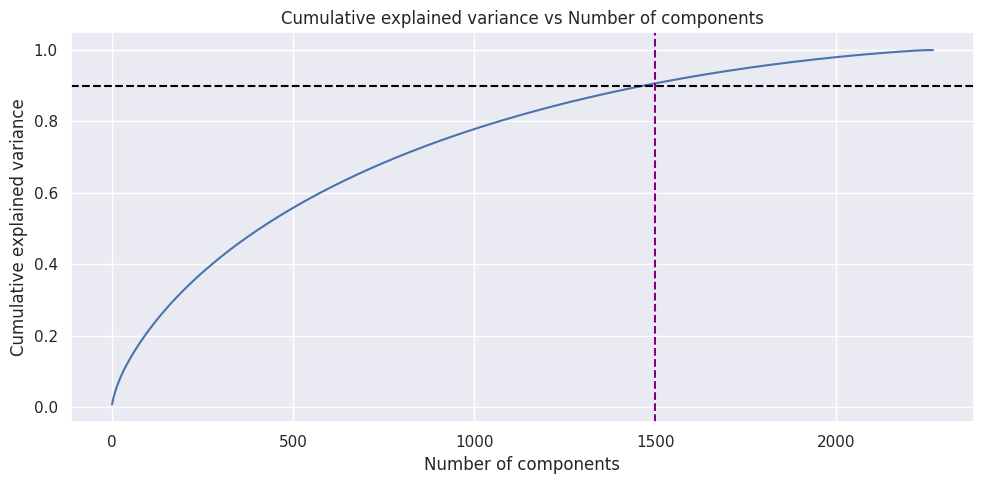

In [110]:
#visualizing variance explained by number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.90, color='black', linestyle='--')
plt.axvline(x= 1500, color='purple', linestyle='--')
#plt.xticks(ticks = np.arange(0,2300))
plt.tight_layout()
plt.show()

90% of the variance is explained by 1500 components, 80% is explained by 1000 components. As the components are high, I will try topic modelling and take them as my new features. In that way, I do not lose my information.

In [157]:
my_check=x_vectorized.copy()

In [158]:
pca1 = PCA(random_state=40,n_components=1500)
pca1.fit(my_check)

PCA(n_components=1500, random_state=40)

In [160]:
# transformed features
x1 = pca1.transform(my_check)

# shape of transformed vectors
x1.shape

(7777, 1500)

#Topic Modeling- GENSIM

Gensim is an open-source library for unsupervised topic modeling, document indexing, retrieval by similarity, and other natural language processing functionalities, using modern statistical machine learning.

In [112]:
df_fe.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,censor,month,Genres,all_cast,proc_all_cast,proc_description,all_features,proc_all_features
0,s1,TV Show,3%,unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"[International TV Shows, TV Dramas, TV Sci-Fi ...",In a future where the elite inhabit an island ...,Adults,8,"[Drama, SciFiFantasy]",drama scififantasy joãomiguel biancacomparato ...,drama scififantasy jo omiguel biancacomparato ...,in a future where the elite inhabit an island ...,drama scififantasy joãomiguel biancacomparato ...,play scififantasy jo omiguel biancacomparato m...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"[Dramas, International Movies]",After a devastating earthquake hits Mexico Cit...,Adults,12,[Drama],drama demiánbichir héctorbonilla oscarserrano ...,drama demi nbichir h ctorbonilla oscarserrano ...,after a devastating earthquake hits mexico cit...,drama demiánbichir héctorbonilla oscarserrano ...,play demi nbichir hydrogen ctorbonilla oscarse...


In [ ]:
topic_input = df_fe['proc_all_cast'] + " " +  df_fe['proc_description']

In [113]:
topic_input=df_fe['proc_all_features']

In [114]:
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel

In [115]:
from gensim.corpora import Dictionary

gensim_paragraphs = (topic_input).apply(lambda row: row.split(' '))
dict_gensim_para = Dictionary(gensim_paragraphs) # dictionary of corpus
dict_gensim_para.filter_extremes(no_below=5, no_above=0.6)

bow_gensim_para = [dict_gensim_para.doc2bow(paragraph) for paragraph in gensim_paragraphs] #creating corpus


In [116]:
from gensim.models import TfidfModel
tfidf_gensim_para = TfidfModel(bow_gensim_para)
vectors_gensim_para = tfidf_gensim_para[bow_gensim_para]

In [117]:
lda_para_model_n = []
for n in (range(4, 12)):
  lda_model = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=1000, eta='auto', iterations=400,
                            num_topics=n, passes=20, eval_every=None,
                            random_state=42)
  lda_coherence = CoherenceModel(model=lda_model, texts=gensim_paragraphs,
                            dictionary=dict_gensim_para, coherence='c_npmi')
  print(n,'|', lda_coherence.get_coherence())
  lda_para_model_n.append((n, lda_model, lda_coherence.get_coherence()))

4 | -0.016162936594060453
5 | -0.009393959350160153
6 | -0.015090048818928517
7 | -0.00382099923105842
8 | -0.027257229779744194
9 | -0.008242849154555885
10 | -0.004092046438107279
11 | -0.023887618005175568


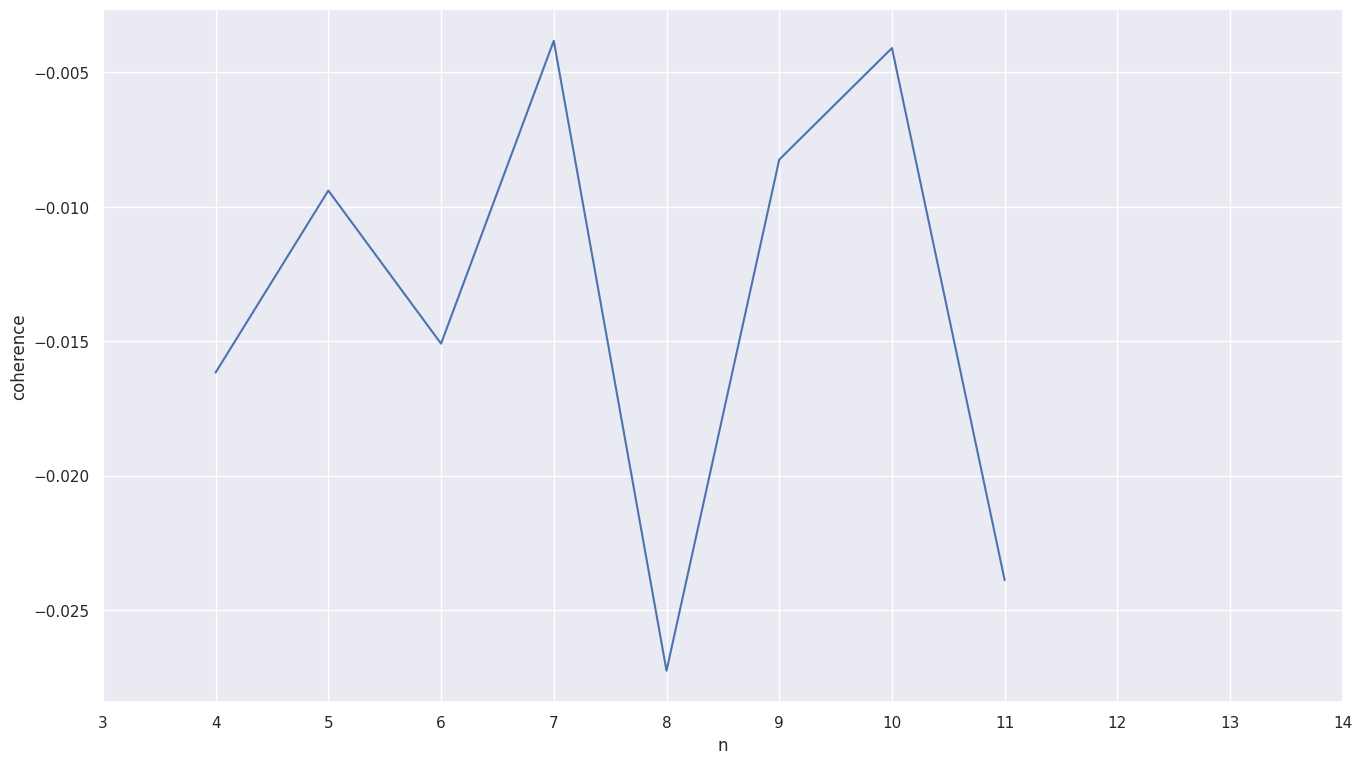

In [118]:
lda_df = pd.DataFrame(lda_para_model_n, columns=["n", "model", "coherence"]).set_index("n")[["coherence"]]
plt.figure(figsize=(16,9))
_ = sns.lineplot(x='n', y='coherence', data=lda_df )
_ = plt.xticks(ticks = np.arange(3,15,1))

In [119]:
lda_df = lda_df.reset_index()
topic_nums = lda_df[lda_df['coherence']==lda_df['coherence'].max()]['n'].to_list()[0]
topic_nums

7

In [127]:
lda_gensim_para = LdaMulticore(corpus=bow_gensim_para, id2word=dict_gensim_para,
                            chunksize=2000, eta='auto', iterations=400,
                            num_topics= topic_nums , passes=20, eval_every=None,
                            random_state=42)

In [ ]:
pip install pyLDAvis

In [121]:
import pyLDAvis
import pyLDAvis.gensim_models

In [128]:
pyLDAvis.enable_notebook()
p = pyLDAvis.gensim_models.prepare(lda_gensim_para, bow_gensim_para, dict_gensim_para)

p

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
1     -0.048286 -0.086296       1        1  24.086508
3     -0.028801  0.195632       2        1  15.193491
0     -0.077716 -0.121449       3        1  14.976964
4      0.331573 -0.019339       4        1  12.965469
2     -0.064501  0.028491       5        1  12.219769
5     -0.057711 -0.139691       6        1  11.174013
6     -0.054557  0.142651       7        1   9.383786, topic_info=                 Term         Freq        Total Category  logprob  loglift
179       documentary  1422.000000  1422.000000  Default  30.0000  30.0000
166             crime   593.000000   593.000000  Default  29.0000  29.0000
249            comedy  2424.000000  2424.000000  Default  28.0000  28.0000
230       love_affair   959.000000   959.000000  Default  27.0000  27.0000
50    actionadventure   839.000000   839.000000  Default  26.0000  26.0000
...               ...          ...          ...      ...      ...      ...
408             child    47.156540   670.330391   Topic7  -5.4795  -0.2881
100         discovery    44.388351   604.459814   Topic7  -5.5400  -0.2452
951          criminal    34.717584   139.704401   Topic7  -5.7857   0.9739
247               aid    35.876512   308.467733   Topic7  -5.7529   0.2147
2148            power    34.285879   165.542069   Topic7  -5.7983   0.7917

[507 rows x 6 columns], token_table=      Topic      Freq      Term
term                           
592       1  0.041080  American
592       2  0.057511  American
592       4  0.410796  American
592       5  0.197182  American
592       7  0.279341  American
...     ...       ...       ...
244       2  0.128260     young
244       3  0.052199     young
244       4  0.001491     young
244       5  0.153614     young
244       7  0.155105     young

[958 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[2, 4, 1, 5, 3, 6, 7])

In [129]:
lda = {}
for i in range(0,lda_gensim_para.num_topics):
  lda[f'Topic {i}'] = np.zeros(df.shape[0])

In [130]:
for i, row in enumerate(lda_gensim_para[bow_gensim_para]):
  for topic in row:
    lda[f'Topic {topic[0]}'][i] = topic[1]

In [131]:
topic_model_df = pd.DataFrame(lda)

In [132]:
topic_model_df.head()

,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,0.000000,0.113582,0.636689,0.000000,0.000000,0.216033,0.000000
1,0.328053,0.000000,0.119954,0.000000,0.000000,0.000000,0.523262
2,0.264807,0.000000,0.000000,0.233496,0.000000,0.137446,0.340380
3,0.420846,0.000000,0.000000,0.104910,0.443926,0.000000,0.000000
4,0.303707,0.260158,0.333328,0.000000,0.000000,0.000000,0.078868


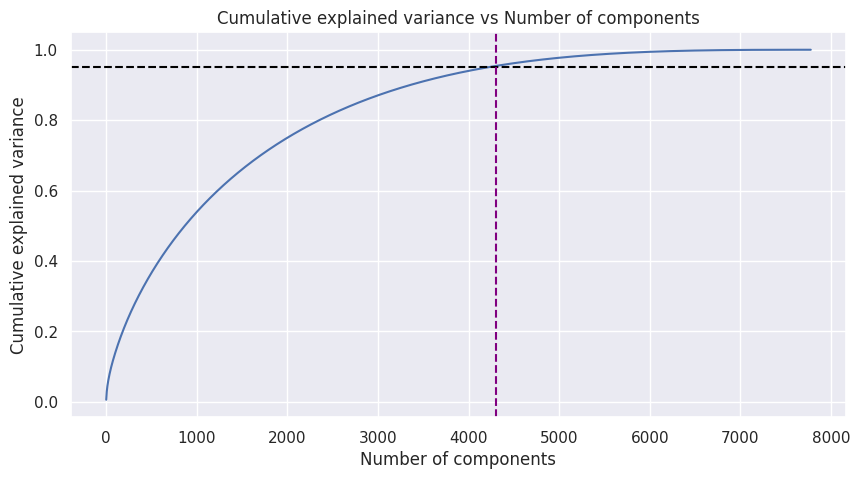

In [ ]:
#visualizing variance explained by number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Cumulative explained variance vs Number of components')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.axhline(y= 0.95, color='black', linestyle='--')
plt.axvline(x= 4300, color='purple', linestyle='--')
plt.show()

It is observed that 100% variance is explained by 5300components and 95% is explained by 4300 components. I am going with 95% to reduce dimensionality.

In [ ]:
#reduced components
pca = PCA(random_state=40,n_components=4300)
pca.fit(x)

PCA(n_components=4300, random_state=40)

In [ ]:
# transformed features
x_trans = pca.transform(x)

# shape of transformed vectors
x_trans.shape

(7777, 4300)

In [ ]:
x_trans

array([[-3.47596748e-02,  7.31447833e-03,  4.43657926e-02, ...,
         1.78169320e-03, -6.77320796e-03,  2.71449698e-04],
       [-4.21180852e-02,  2.62380587e-02, -2.51642965e-02, ...,
         5.75042295e-03, -2.73343046e-03,  5.13082222e-04],
       [-5.19051609e-02, -8.88469804e-03, -5.79348969e-03, ...,
        -2.16559068e-03, -2.13942660e-03,  3.43881303e-03],
       ...,
       [ 1.09268126e-01,  8.42841375e-02, -8.36745326e-02, ...,
        -7.62689852e-03, -5.97753468e-03,  3.90989110e-03],
       [ 1.97847355e-02,  4.11941684e-02,  5.16732558e-02, ...,
        -5.97158573e-03, -8.39070347e-03,  9.82018342e-03],
       [ 3.04102191e-01,  6.94006433e-02, -1.29039213e-01, ...,
        -7.11242365e-03, -5.37957173e-04, -6.58663759e-03]])

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

I used Principal Component Analysis because it is able to identify patterns in the data that are responsible for the most variation.

These patterns, known as principal components, are linear combinations of the original features that are uncorrelated with each other.

By using the first few principal components, which account for the majority of the variation in the data, one can effectively reduce the dimensionality of the data while maintaining most of the important information.




### 4. Feature Manipulation & Selection

 Already done above

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [81]:
# Transform Your data
#No need to transform data

### 6. Data Scaling

In [133]:
# Scaling your data

non_text_df

,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults,show_duration,movie_duration,release_year_bins
0,0,1,0,0,0,1,4,0,2020
1,1,0,0,0,0,1,0,93,2010
2,1,0,0,0,0,1,0,78,2010
3,1,0,0,0,1,0,0,80,2000
4,1,0,0,0,1,0,0,123,2000
...,...,...,...,...,...,...,...,...,...
7782,1,0,0,0,0,1,0,99,2000
7783,1,0,0,0,1,0,0,111,2010
7784,1,0,0,0,0,1,0,44,2010
7785,0,1,0,1,0,0,1,0,2010


In [163]:
abc=pd.DataFrame(x1)

In [378]:
final_df = pd.concat([pd.DataFrame(non_text_df ),(topic_model_df)],axis=1)

In [379]:
final_df

,Adult,Kids,Older Kids,Teens,Movie,TV Show,show_duration,movie_duration,release_year_bins,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,1.0,0.0,0.0,0.0,0.0,1.0,4.0,0.0,2020.0,0.000000,0.351697,0.000000,0.118609,0.000000,0.000000,0.495946
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,93.0,2010.0,0.000000,0.000000,0.699003,0.000000,0.000000,0.000000,0.265105
2,1.0,0.0,0.0,0.0,1.0,0.0,0.0,78.0,2010.0,0.144411,0.072927,0.000000,0.457332,0.000000,0.000000,0.301425
3,0.0,0.0,0.0,1.0,1.0,0.0,0.0,80.0,2000.0,0.294866,0.000000,0.000000,0.100107,0.147234,0.000000,0.435177
4,0.0,0.0,0.0,1.0,1.0,0.0,0.0,123.0,2000.0,0.087273,0.222063,0.000000,0.000000,0.000000,0.520056,0.146696
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3374,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.200670,0.000000,0.317996,0.000000,0.449465,0.000000
3492,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.112400,0.191697,0.469146,0.000000,0.197987,0.000000
3946,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.306490,0.000000,0.000000,0.645720,0.000000,0.000000
5137,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.200911,0.000000,0.000000,0.358266,0.408955,0.000000,0.000000


In [134]:
#scaling using standard scaler
scaler=StandardScaler()

x_scale = scaler.fit_transform(non_text_df)


In [168]:
final_df2 = pd.concat([pd.DataFrame(x_scale,columns = non_text_df.columns ),(abc)],axis=1)

In [169]:
final_df2.dropna(inplace=True)
final_df2

,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults,show_duration,movie_duration,release_year_bins,0,...,1490,1491,1492,1493,1494,1495,1496,1497,1498,1499
0,-1.496802,1.496802,-0.265471,-0.453582,-0.650828,1.070500,2.908065,-1.329552,1.290684,-0.016609,...,-0.005057,0.002790,-0.012496,-0.010926,0.015877,-0.014816,0.026976,0.013616,0.008480,0.000924
1,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,0.471292,0.167528,-0.009306,...,0.000108,-0.004084,-0.003233,0.009970,-0.007622,0.016623,-0.009791,-0.018700,-0.009090,0.008068
2,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,0.180834,0.167528,-0.000655,...,-0.007302,-0.016933,-0.004760,0.010862,0.011338,-0.003920,-0.006060,-0.008344,-0.009476,0.001710
3,0.668091,-0.668091,-0.265471,-0.453582,1.536505,-0.934142,-0.457164,0.219562,-0.955629,0.023002,...,0.011696,-0.002295,0.011820,0.023879,0.000405,0.019387,-0.002984,-0.017627,-0.000914,0.024195
4,0.668091,-0.668091,-0.265471,-0.453582,1.536505,-0.934142,-0.457164,1.052210,-0.955629,-0.007824,...,0.010120,0.005156,0.010301,-0.006633,-0.018345,0.015078,0.008148,0.027807,-0.013684,0.015638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,0.587476,-0.955629,-0.031384,...,-0.000458,0.007900,0.011585,-0.002912,0.001484,0.001528,-0.015060,-0.007067,-0.000836,0.006569
7773,0.668091,-0.668091,-0.265471,-0.453582,1.536505,-0.934142,-0.457164,0.819843,0.167528,-0.014684,...,-0.013082,0.015152,0.024310,-0.008493,-0.009907,-0.005859,0.016775,0.007734,0.011594,0.004013
7774,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,-0.477540,0.167528,0.195090,...,-0.003222,0.022988,0.014652,0.010423,0.029858,0.006245,0.013754,0.015328,-0.002607,0.000451
7775,-1.496802,1.496802,-0.265471,2.204674,-0.650828,-0.934142,0.384143,-1.329552,0.167528,0.025253,...,0.000539,-0.007941,-0.019528,-0.018907,0.005173,0.026197,0.032962,-0.017578,0.029155,0.004437


In [135]:
#concatinating topic_model_df and x_scale
final_df = pd.concat([pd.DataFrame(x_scale,columns = non_text_df.columns ),(topic_model_df)],axis=1)


In [137]:
final_df.dropna(inplace=True)

In [138]:

final_df

,type_Movie,type_TV Show,censor_Kids,censor_Older Kids,censor_Teens,censor_Adults,show_duration,movie_duration,release_year_bins,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,Topic 6
0,-1.496802,1.496802,-0.265471,-0.453582,-0.650828,1.070500,2.908065,-1.329552,1.290684,0.000000,0.113582,0.636689,0.000000,0.000000,0.216033,0.000000
1,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,0.471292,0.167528,0.328053,0.000000,0.119954,0.000000,0.000000,0.000000,0.523262
2,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,0.180834,0.167528,0.264807,0.000000,0.000000,0.233496,0.000000,0.137446,0.340380
3,0.668091,-0.668091,-0.265471,-0.453582,1.536505,-0.934142,-0.457164,0.219562,-0.955629,0.420846,0.000000,0.000000,0.104910,0.443926,0.000000,0.000000
4,0.668091,-0.668091,-0.265471,-0.453582,1.536505,-0.934142,-0.457164,1.052210,-0.955629,0.303707,0.260158,0.333328,0.000000,0.000000,0.000000,0.078868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,0.587476,-0.955629,0.011943,0.011961,0.011950,0.011964,0.011924,0.674840,0.265419
7773,0.668091,-0.668091,-0.265471,-0.453582,1.536505,-0.934142,-0.457164,0.819843,0.167528,0.237015,0.348618,0.000000,0.000000,0.000000,0.235121,0.156587
7774,0.668091,-0.668091,-0.265471,-0.453582,-0.650828,1.070500,-0.457164,-0.477540,0.167528,0.000000,0.000000,0.242253,0.172332,0.551675,0.000000,0.000000
7775,-1.496802,1.496802,-0.265471,2.204674,-0.650828,-0.934142,0.384143,-1.329552,0.167528,0.655165,0.011930,0.011937,0.011928,0.285178,0.011928,0.011934


### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
#No need to split.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)
#No need for this project

## ***7. ML Model Implementation***

### ML Model - 1 K-Means Clustering

K-means is an unsupervised learning algorithm that aims to divide an unlabeled dataset into k clusters by minimizing the sum of distances between data points and their assigned cluster centroids. The value of k needs to be predefined. The algorithm iteratively determines the best centroids and assigns each data point to its closest centroid, forming clusters. Two common methods to determine the optimal value of k are the elbow method, which looks for the point of diminishing returns in the within-cluster sum of squares, and the silhouette method, which measures the similarity of data points within their own cluster compared to other clusters.

In [139]:
clustering_score = {
    'Algorithm':[],
    'Parameters':[],
    'Clusters':[],
    'Silhouette Coefficient':[],
    'Davies-Bouldin Index': []
}

In [150]:
def update_report(algo_name, details,clusters, sil_score, db_index):
  data = [algo_name, details, clusters,sil_score, db_index]
  for i,j in enumerate(clustering_score):
    clustering_score[j].append(data[i])

In [141]:
final_df=final_df.to_numpy()

In [143]:
# ML Model - 1 Implementation

clusters=[i for i in range(2,21)]
silhouette_avg = []
Sum_of_squared_distances = []

# Fit the Algorithm
for num_clusters in clusters:

 kmeans = KMeans(n_clusters=num_clusters, init='k-means++',n_init=10,random_state=40)
 #fitting model
 kmeans.fit(final_df)
 cluster_labels = kmeans.labels_
 silhouette_avg.append(silhouette_score(final_df, cluster_labels))
 Sum_of_squared_distances.append(kmeans.inertia_);


In [171]:
final_df2=final_df2.to_numpy()

In [172]:
# ML Model - 1 Implementation

clusters1=[i for i in range(2,26)]
silhouette_avg1 = []
Sum_of_squared_distances1 = []

# Fit the Algorithm
for num_clusters in clusters1:

 kmeans = KMeans(n_clusters=num_clusters, init='k-means++',n_init=10,random_state=40)
 #fitting model
 kmeans.fit(final_df2)
 cluster_labels2 = kmeans.labels_
 silhouette_avg1.append(silhouette_score(final_df2, cluster_labels2))
 Sum_of_squared_distances1.append(kmeans.inertia_);


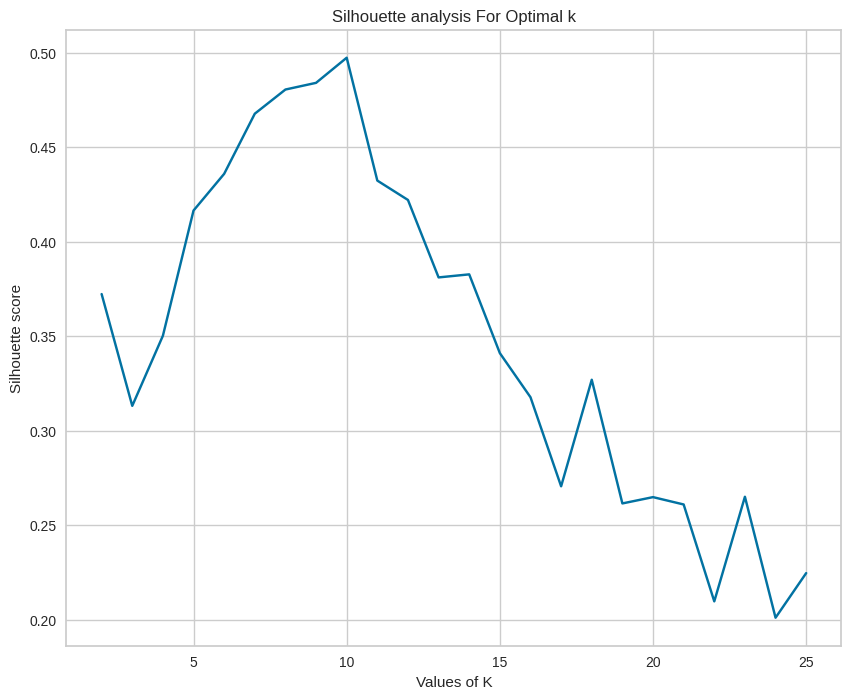

In [173]:
 # silhouette score
plt.figure(figsize=(10,8))
plt.plot(clusters1,silhouette_avg1,'bx-')
plt.xlabel('Values of K')
plt.ylabel('Silhouette score')
plt.title('Silhouette analysis For Optimal k')
plt.show()

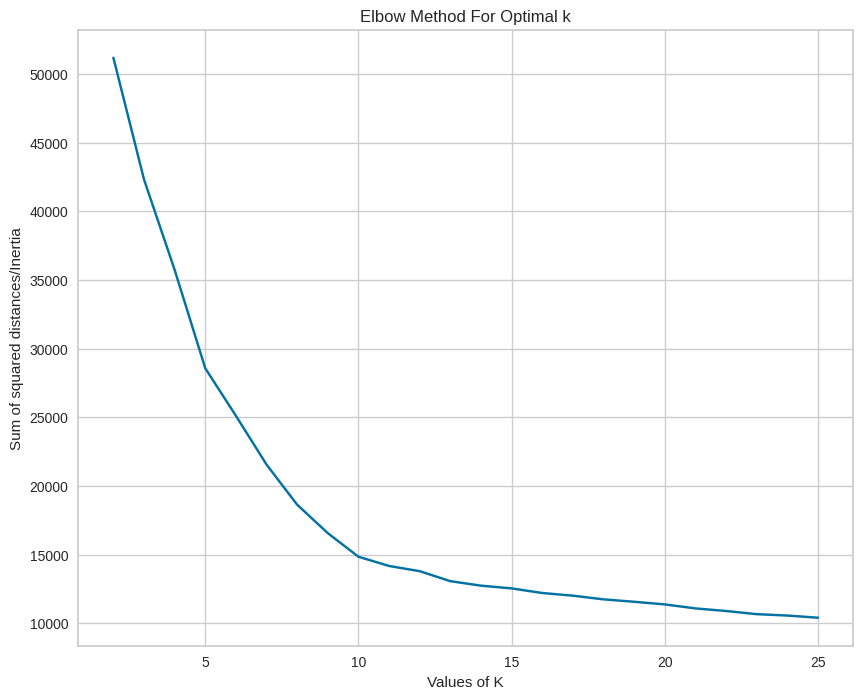

In [174]:
# Elbow method

plt.figure(figsize=(10,8))
plt.plot(clusters1,Sum_of_squared_distances1,'bx-')

plt.xlabel('Values of K')
plt.ylabel('Sum of squared distances/Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


highest silhouette is at 10 and there are 2 bends at 5 and 10. I will build with 10 clusters.

In [145]:
#from sklearn.metrics import silhouette_score, silhouette_samples
from yellowbrick.cluster import SilhouetteVisualizer
def silhouette_score_analysis(n):

  for n_clusters in range(2,n):
      km = KMeans (n_clusters=n_clusters,init='k-means++',n_init=10, random_state=40)
      preds = km.fit_predict(final_df)
      centers = km.cluster_centers_

      score = silhouette_score(final_df, preds, metric='euclidean')
      print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

      visualizer = SilhouetteVisualizer(km)

      visualizer.fit(final_df) # Fit the training data to the visualizer
      visualizer.poof() # Draw/show/poof the data

For n_clusters = 2, silhouette score is 0.40663784494204364


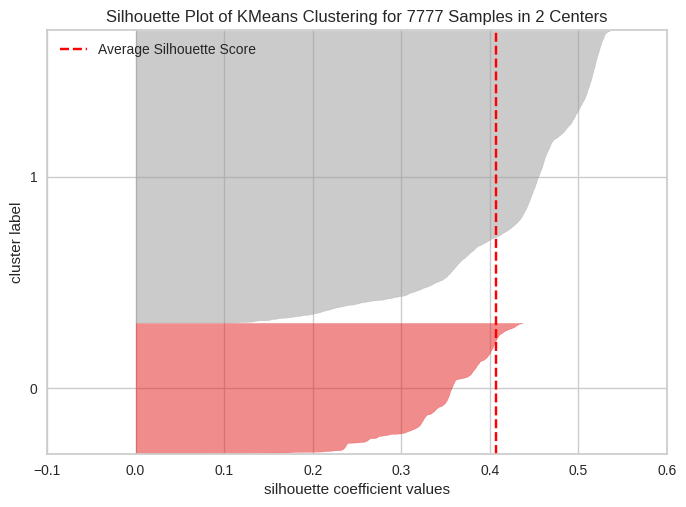

For n_clusters = 3, silhouette score is 0.36925015982145737


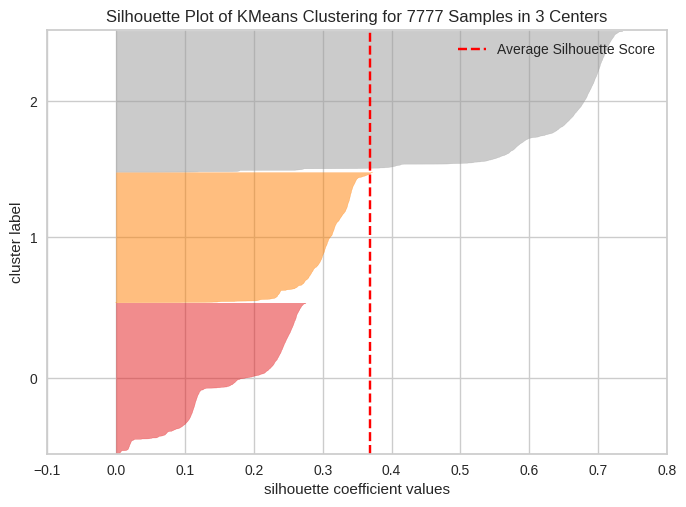

For n_clusters = 4, silhouette score is 0.41673085932408094


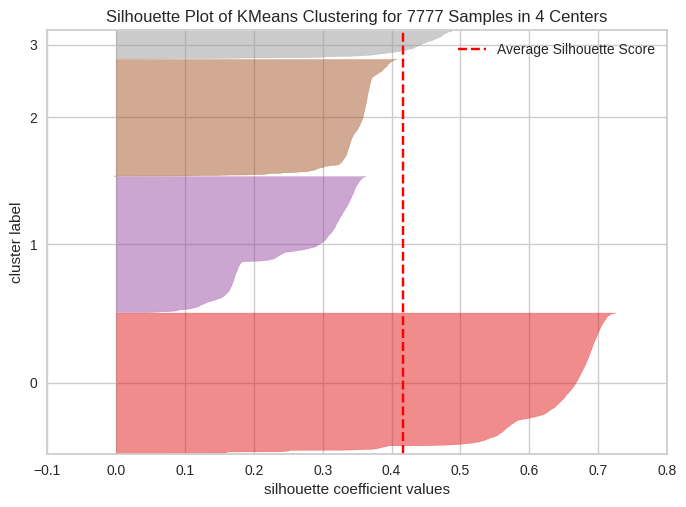

For n_clusters = 5, silhouette score is 0.49420408682550004


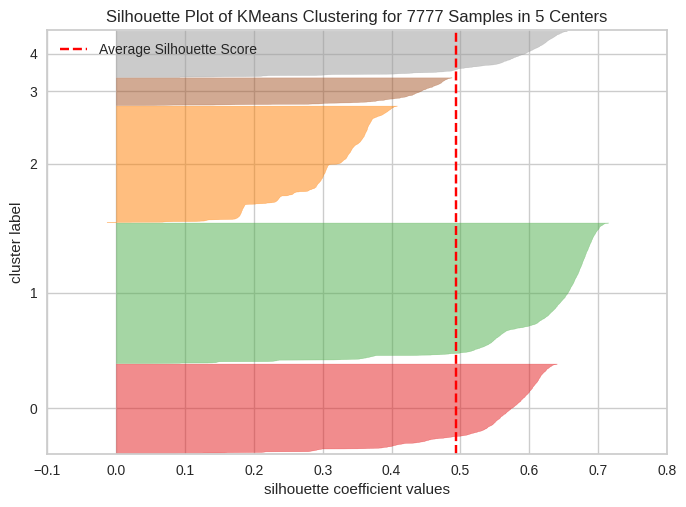

For n_clusters = 6, silhouette score is 0.5198108719334715


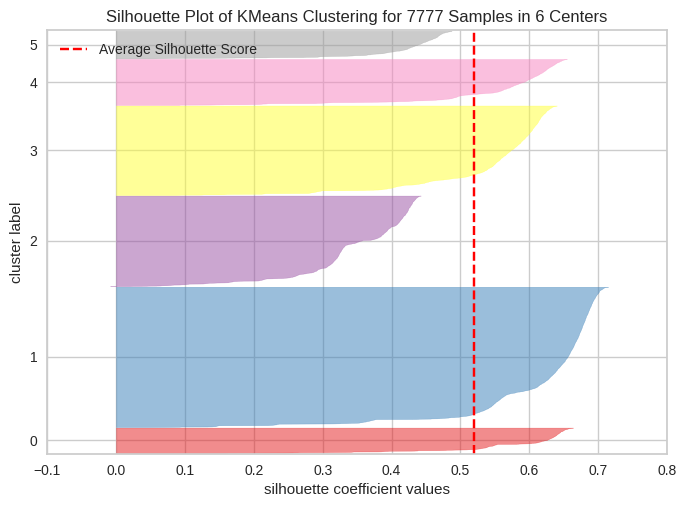

For n_clusters = 7, silhouette score is 0.5604887739624078


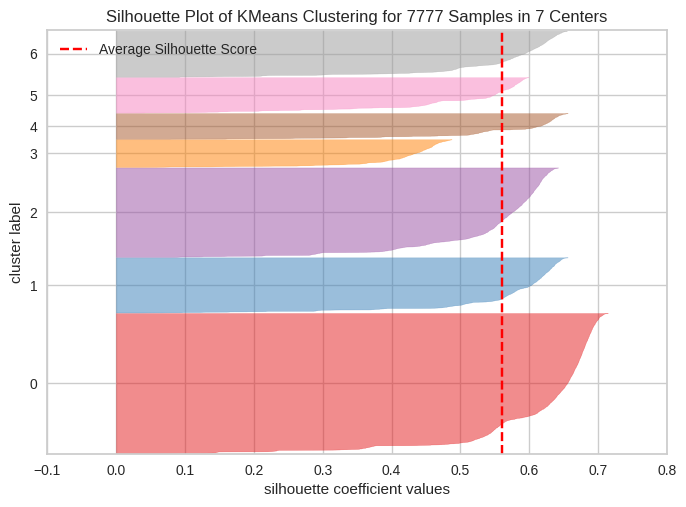

For n_clusters = 8, silhouette score is 0.577764130122574


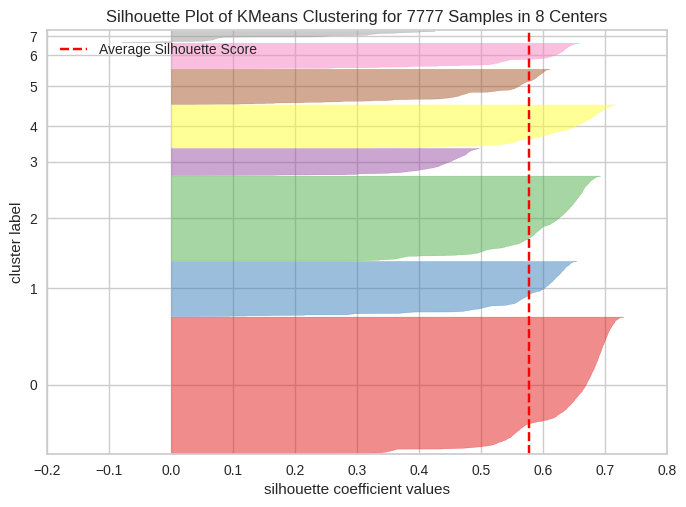

For n_clusters = 9, silhouette score is 0.588092212467103


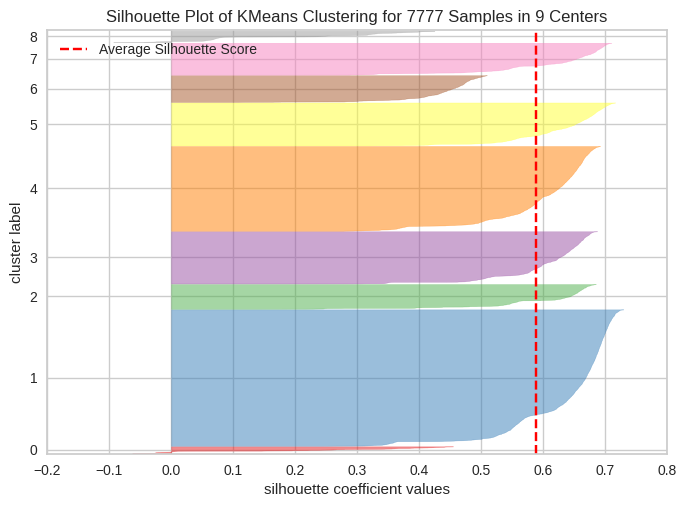

For n_clusters = 10, silhouette score is 0.5982364284598156


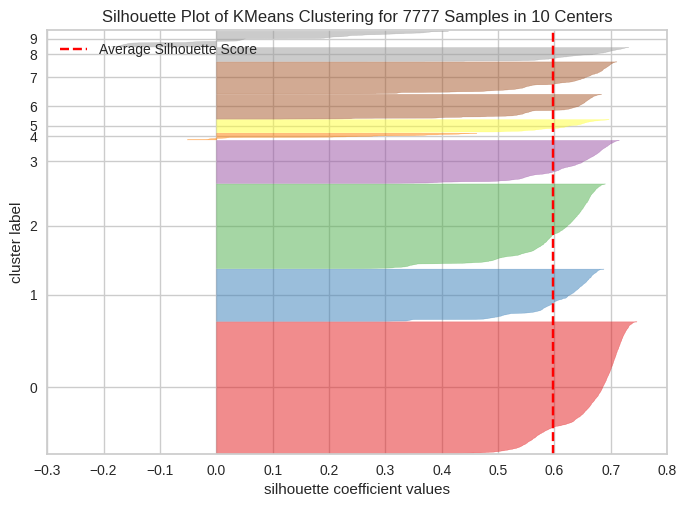

For n_clusters = 11, silhouette score is 0.5656391074368287


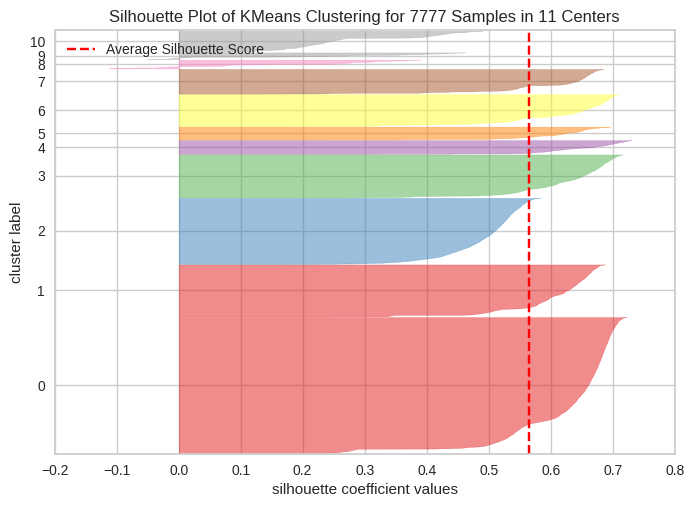

For n_clusters = 12, silhouette score is 0.5171611162513436


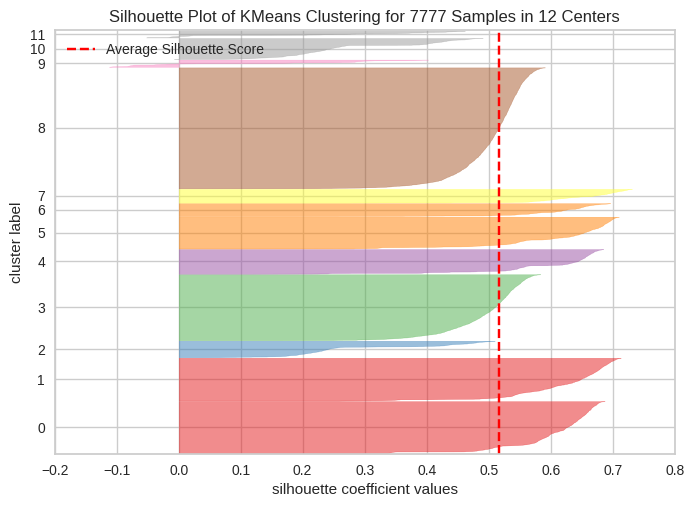

For n_clusters = 13, silhouette score is 0.5225559787354274


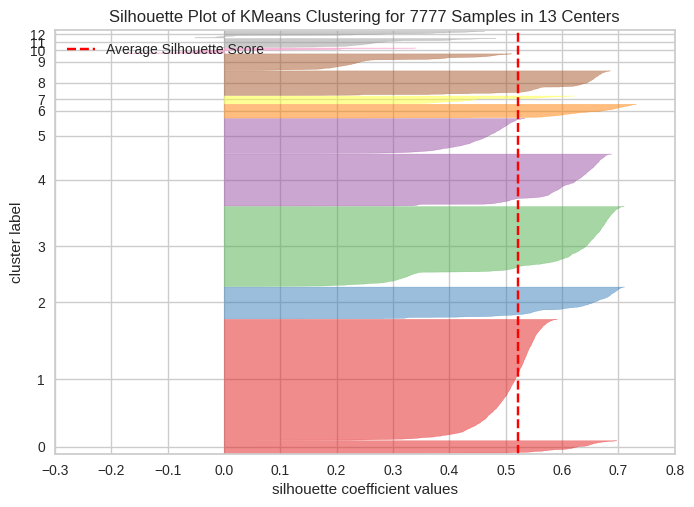

For n_clusters = 14, silhouette score is 0.4867074849871601


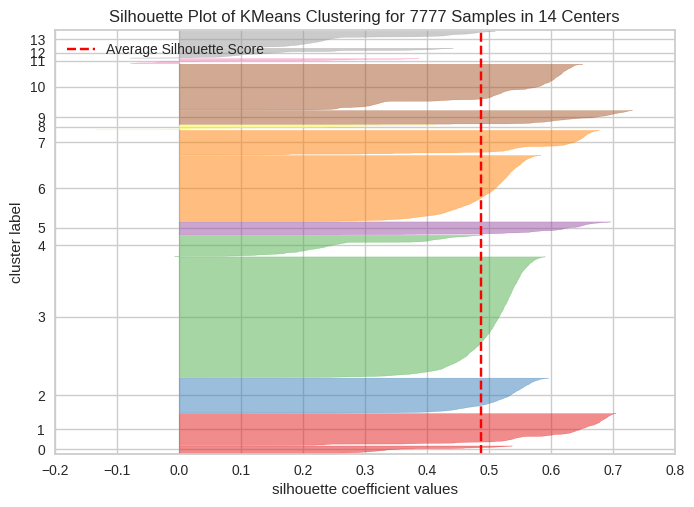

For n_clusters = 15, silhouette score is 0.3959748241417931


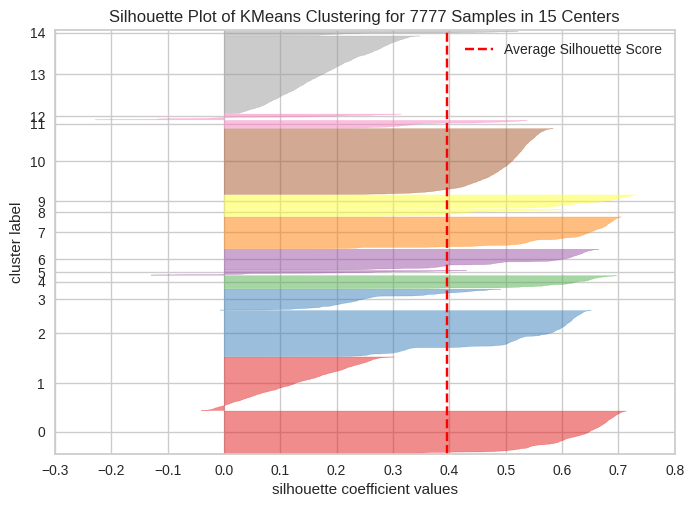

For n_clusters = 16, silhouette score is 0.432598737622007


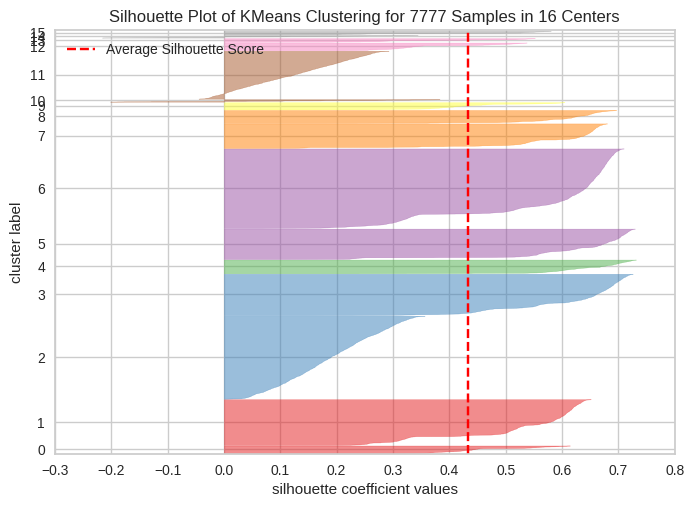

For n_clusters = 17, silhouette score is 0.37000886766147056


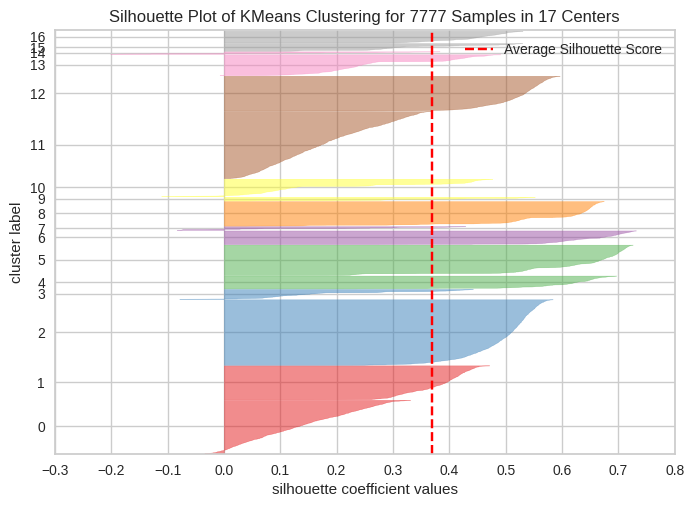

For n_clusters = 18, silhouette score is 0.44531788222969426


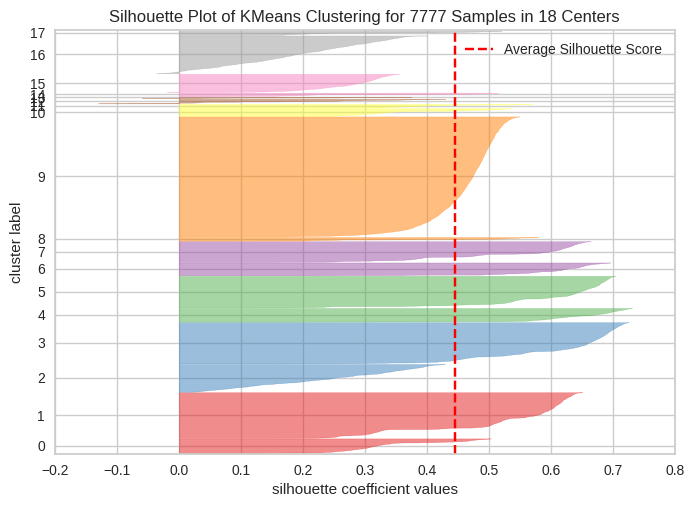

For n_clusters = 19, silhouette score is 0.3242902387606166


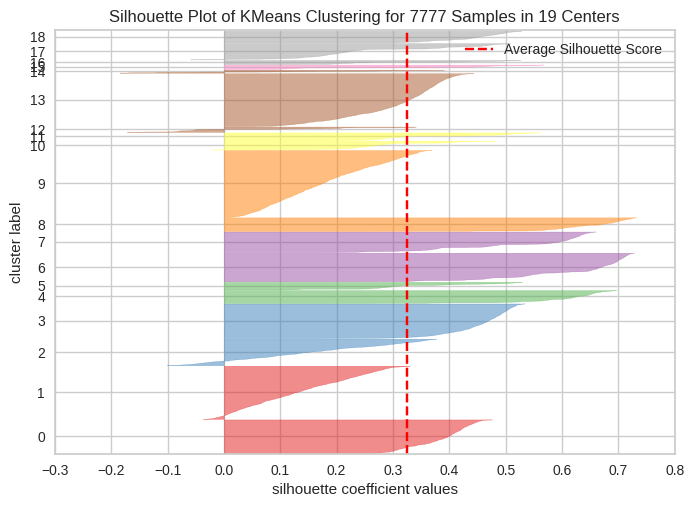

In [146]:
silhouette_score_analysis(20)

In [148]:
#fitting model at k=10
kmeans = KMeans(n_clusters=10, init='k-means++', random_state=40,n_init=10)
kmeans.fit(final_df)


#prediction
predictions = kmeans.fit_predict(final_df)



In [149]:
# Evaluation metrics  Silhouette score,davies_bouldin_score

kmeans_silhouette_score = silhouette_score(final_df, predictions)
kmeans_davies_bouldin_score=davies_bouldin_score(final_df,predictions)
print( kmeans_silhouette_score)
print( kmeans_davies_bouldin_score)

0.5982364284598156
0.7301456060998616


In [151]:
update_report('KMeans','Default' ,pd.Series(predictions).nunique(), silhouette_score(final_df,predictions), davies_bouldin_score(final_df,predictions))

In [111]:
# Evaluation metrics  Silhouette score

#kmeans_silhouette_score = silhouette_score(final_df, kmeans.labels_)

#print( kmeans_silhouette_score)

0.012174960910854805


Silhouette score is a metric used to evaluate the quality of clustering results. It measures how similar an object is to its own cluster (cohesion) compared to other clusters (separation). A silhouette score ranges from -1 to 1, with higher scores indicating better clustering.

I am going to add more features and do topic modeling on Director, cast, description and add those topics as my features and then cluster them to see any improvement in silhouette score.

In [107]:
# Adding a kmeans cluster number attribute
df_copy['kmeans_clusters'] = kmeans.labels_

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [154]:
# Visualizing evaluation Metric Score chart
data = {
    'Algorithm': ['KMeans'],
    'Parameters': ['Default'],
    'Clusters': [10],
    'Silhouette Coefficient': [0.5982364284598156],
    'Davies-Bouldin Index': [0.7301456060998616]
}

df_result_kmeans= pd.DataFrame(data)

In [155]:
df_result_kmeans


,Algorithm,Parameters,Clusters,Silhouette Coefficient,Davies-Bouldin Index
0,KMeans,Default,10,0.598236,0.730146


Silhouette score range is -1 to 1 and more the score is better the clustering, here 0.59 for 10 clusters and Davies-Bouldin score range is 0 to infinty, the lower or closer to 0 is better the clustering, here 0.7 for 10 clusteres.
Lets do hierarichal clustering

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3 DBSCAN

In [1]:
# ML Model - 3 Implementation
final_df=

# Fit the Algorithm

# Predict on the model

NameError: ignored

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***